# Inspection for GeneralA2C

New features to include:
- player info
- top 5 actions and their distributions

TODO:
- look at state trajectories, they should be a list of dictionaries {"spatial","player"}
- create wrapper functions for the state plotting if possible, otherwise do it from scratch
- print in a formatted way all player info
- in general might be interesting for some minigames to plot some player info together with either the critic value or the actor adavantages in a step-by-step way
- change the way in which we deal with decision map plotting (?)

In [1]:
import os
import sys
sys.path.insert(0, "../")
# Custom modules
from AC_modules.BatchedA2C import GeneralA2C
from SC_Utils.game_utils import FullObsProcesser
import AC_modules.Networks as net
# change this inspection plots
from SC_Utils.inspection_plots_v2 import *
from SC_Utils.A2C_inspection_v2 import *
from SC_Utils.train_v4 import init_game, inspection_test

import torch
import numpy as np
import matplotlib.pyplot as plt

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
# Define map_name and PID - ALWAYS

game_names = {1:'MoveToBeacon',
              2:'CollectMineralShards',
              3:'DefeatRoaches',
              4:'FindAndDefeatZerglings',
              5:'DefeatZerglingsAndBanelings',
              6:'CollectMineralsAndGas',
              7:'BuildMarines'
              }
map_name = game_names[1]

PID = "LCLR"

# Online plotting of training curve

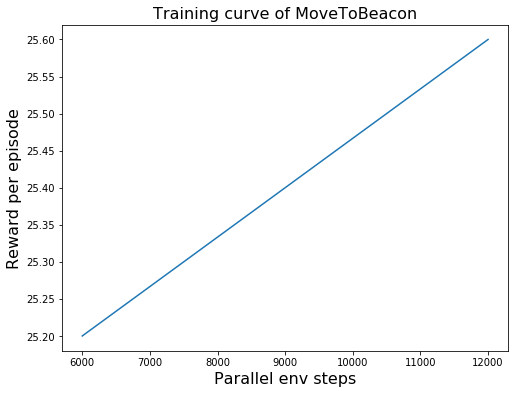

In [3]:
filename = '../Results/'+map_name+'/Logging/'+PID+'.txt'
logging = np.loadtxt(filename, delimiter=',', skiprows=1)
plot_logging(logging, map_name)

# Checkpoints at a certain step

In [4]:
jump = 6000 # number of env step after which an inspection is done
n = 2 # number of "jumps" to current step idx
step_idx =jump*n
step_idx

12000

In [5]:
load_dir = "../Results/"+map_name+"/Inspection/"
insp_dict = np.load(load_dir+PID+"_"+str(step_idx)+".npy", allow_pickle=True).item()

### Trajectory update

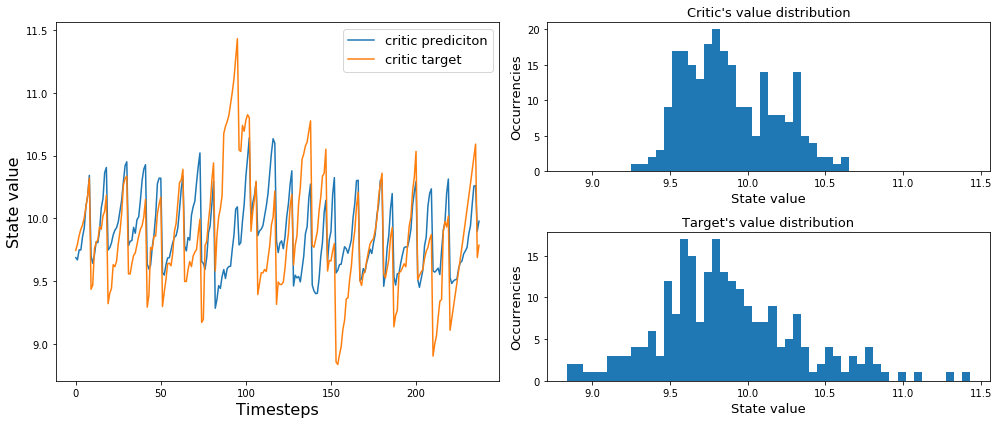

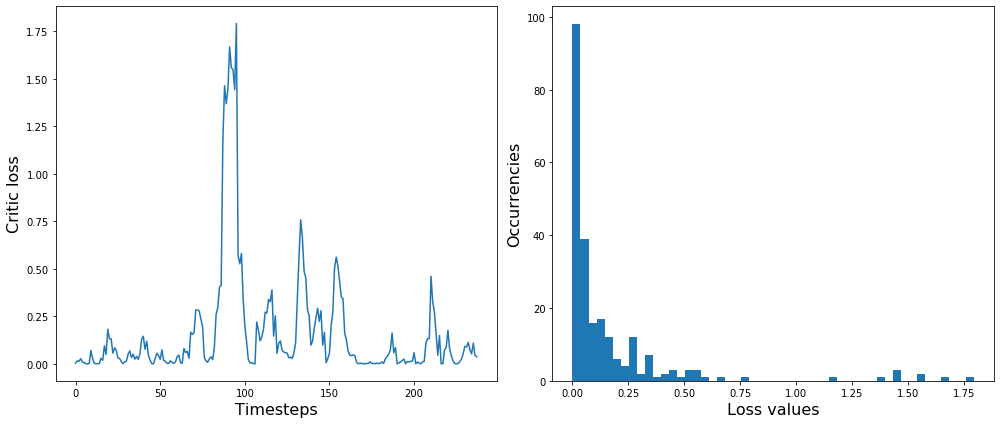

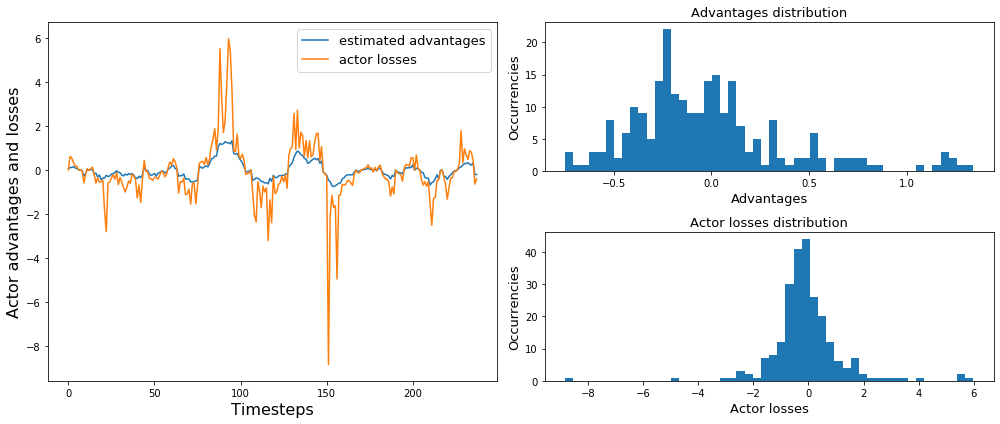

In [6]:
plot_update_curves(insp_dict)

## Agent-related visualizations

Here we need either to init a new agent and load a checkpoint or to load directly the full-trained agent if the training cycle is ended (automatic saving of the whole class if using the run.py script to train).

In [7]:
### Environment parameters ###
RESOLUTION = 32
game_params = dict(feature_screen=RESOLUTION, feature_minimap=RESOLUTION, action_space="FEATURES") 
env = init_game(game_params, map_name)

obs_proc_params = {'select_all':True}
op = FullObsProcesser(**obs_proc_params)

screen_channels, minimap_channels, in_player = op.get_n_channels()
in_channels = screen_channels + minimap_channels 

In [8]:
load = False

if load:
    agent = torch.load("../Results/"+map_name+"/agent_"+PID, map_location='cpu')
    agent.device = 'cpu'
else:
    ### Agent architecture parameters ###
    spatial_model = net.FullyConvPlayerAndSpatial
    nonspatial_model = net.FullyConvNonSpatial
    # Internal features, passed inside a dictionary
    conv_channels = 32
    player_features = 16
    # Exposed features, passed outside of a dictionary
    n_channels = 48
    n_features = 256
    spatial_dict = {"in_channels":in_channels, 'in_player':in_player, 
                    'conv_channels':conv_channels, 'player_features':player_features}
    nonspatial_dict = {'resolution':RESOLUTION, 'kernel_size':3, 'stride':2, 'n_channels':n_channels}
    
    ### A2C parameters ###
    HPs = dict(gamma=0.99, n_steps=20, H=1e-2, 
               spatial_model=spatial_model, nonspatial_model=nonspatial_model,
               n_features=n_features, n_channels=n_channels, 
               spatial_dict=spatial_dict, nonspatial_dict=nonspatial_dict)

    if torch.cuda.is_available():
        HPs['device'] = 'cuda'
    else:
        HPs['device'] = 'cpu'

    print("Using device "+HPs['device'])

    lr = 7e-4
    
    # Agent init 
    agent = GeneralA2C(env=env, **HPs)
    # Load proper checkpoint here - not activated in case of load=True, but can be changed if needed
    agent.AC.load_state_dict(torch.load("../Results/"+map_name+"/Checkpoints/"+PID+"_"+str(step_idx), map_location='cpu'))

Using device cpu


In [9]:
# inspector needed for the plotting
inspector = inspection_test(step_idx, agent, env, PID, op, agent.AC.action_space)
insp_dict = inspector.dict

In [10]:
actions = [1, 2, 3, 4, 7, 12, 13, 274, 331, 332, 333, 334, 451, 452, 453]

In [26]:
for a in range(50):
    print(a, agent.AC.all_actions[a])

0 0/no_op ()
1 1/move_camera (1/minimap [32, 32])
2 2/select_point (6/select_point_act [4]; 0/screen [32, 32])
3 3/select_rect (7/select_add [2]; 0/screen [32, 32]; 2/screen2 [32, 32])
4 4/select_control_group (4/control_group_act [5]; 5/control_group_id [10])
5 5/select_unit (8/select_unit_act [4]; 9/select_unit_id [500])
6 6/select_idle_worker (10/select_worker [4])
7 7/select_army (7/select_add [2])
8 8/select_warp_gates (7/select_add [2])
9 9/select_larva ()
10 10/unload (12/unload_id [500])
11 11/build_queue (11/build_queue_id [10])
12 12/Attack_screen (3/queued [2]; 0/screen [32, 32])
13 13/Attack_minimap (3/queued [2]; 1/minimap [32, 32])
14 14/Attack_Attack_screen (3/queued [2]; 0/screen [32, 32])
15 15/Attack_Attack_minimap (3/queued [2]; 1/minimap [32, 32])
16 16/Attack_AttackBuilding_screen (3/queued [2]; 0/screen [32, 32])
17 17/Attack_AttackBuilding_minimap (3/queued [2]; 1/minimap [32, 32])
18 18/Attack_Redirect_screen (3/queued [2]; 0/screen [32, 32])
19 19/Scan_Move_scr

1 move_camera (1/minimap [32, 32])
2 select_point (6/select_point_act [4]; 0/screen [32, 32])
3 select_rect (7/select_add [2]; 0/screen [32, 32]; 2/screen2 [32, 32])
6 select_idle_worker (7/select_add [2])
7 select_army (7/select_add [2])
12 Attack_screen (3/queued [2]; 0/screen [32, 32])
13 Attack_minimap (3/queued [2]; 1/minimap [32, 32])
42 Build_Barracks_screen (3/queued [2]; 0/screen [32, 32])
44 Build_CommandCenter_screen (3/queued [2]; 0/screen [32, 32])

In [27]:
for a in range(50,100):
    print(a, agent.AC.all_actions[a])

50 50/Build_EngineeringBay_screen (3/queued [2]; 0/screen [32, 32])
51 51/Build_EvolutionChamber_screen (3/queued [2]; 0/screen [32, 32])
52 52/Build_Extractor_screen (3/queued [2]; 0/screen [32, 32])
53 53/Build_Factory_screen (3/queued [2]; 0/screen [32, 32])
54 54/Build_FleetBeacon_screen (3/queued [2]; 0/screen [32, 32])
55 55/Build_Forge_screen (3/queued [2]; 0/screen [32, 32])
56 56/Build_FusionCore_screen (3/queued [2]; 0/screen [32, 32])
57 57/Build_Gateway_screen (3/queued [2]; 0/screen [32, 32])
58 58/Build_GhostAcademy_screen (3/queued [2]; 0/screen [32, 32])
59 59/Build_Hatchery_screen (3/queued [2]; 0/screen [32, 32])
60 60/Build_HydraliskDen_screen (3/queued [2]; 0/screen [32, 32])
61 61/Build_InfestationPit_screen (3/queued [2]; 0/screen [32, 32])
62 62/Build_Interceptors_quick (3/queued [2])
63 63/Build_Interceptors_autocast ()
64 64/Build_MissileTurret_screen (3/queued [2]; 0/screen [32, 32])
65 65/Build_Nexus_screen (3/queued [2]; 0/screen [32, 32])
66 66/Build_Nuke_q

79 Build_Refinery_screen (3/queued [2]; 0/screen [32, 32])
91 Build_SupplyDepot_screen (3/queued [2]; 0/screen [32, 32])

In [14]:
for a in range(100,150):
    print(a, agent.AC.all_actions[a].name)

100 Build_TemplarArchive_screen
101 Build_TwilightCouncil_screen
102 Build_UltraliskCavern_screen
103 BurrowDown_quick
104 BurrowDown_Baneling_quick
105 BurrowDown_Drone_quick
106 BurrowDown_Hydralisk_quick
107 BurrowDown_Infestor_quick
108 BurrowDown_InfestorTerran_quick
109 BurrowDown_Lurker_quick
110 BurrowDown_Queen_quick
111 BurrowDown_Ravager_quick
112 BurrowDown_Roach_quick
113 BurrowDown_SwarmHost_quick
114 BurrowDown_Ultralisk_quick
115 BurrowDown_WidowMine_quick
116 BurrowDown_Zergling_quick
117 BurrowUp_quick
118 BurrowUp_autocast
119 BurrowUp_Baneling_quick
120 BurrowUp_Baneling_autocast
121 BurrowUp_Drone_quick
122 BurrowUp_Hydralisk_quick
123 BurrowUp_Hydralisk_autocast
124 BurrowUp_Infestor_quick
125 BurrowUp_InfestorTerran_quick
126 BurrowUp_InfestorTerran_autocast
127 BurrowUp_Lurker_quick
128 BurrowUp_Queen_quick
129 BurrowUp_Queen_autocast
130 BurrowUp_Ravager_quick
131 BurrowUp_Ravager_autocast
132 BurrowUp_Roach_quick
133 BurrowUp_Roach_autocast
134 BurrowUp_SwarmH

In [15]:
for a in range(150,200):
    print(a, agent.AC.all_actions[a].name)

150 Cancel_MorphGreaterSpire_quick
151 Cancel_MorphHive_quick
152 Cancel_MorphLair_quick
153 Cancel_MorphLurker_quick
154 Cancel_MorphLurkerDen_quick
155 Cancel_MorphMothership_quick
156 Cancel_MorphOrbital_quick
157 Cancel_MorphOverlordTransport_quick
158 Cancel_MorphOverseer_quick
159 Cancel_MorphPlanetaryFortress_quick
160 Cancel_MorphRavager_quick
161 Cancel_MorphThorExplosiveMode_quick
162 Cancel_NeuralParasite_quick
163 Cancel_Nuke_quick
164 Cancel_SpineCrawlerRoot_quick
165 Cancel_SporeCrawlerRoot_quick
166 Cancel_StarportAddOn_quick
167 Cancel_StasisTrap_quick
168 Cancel_Last_quick
169 Cancel_HangarQueue5_quick
170 Cancel_Queue1_quick
171 Cancel_Queue5_quick
172 Cancel_QueueAddOn_quick
173 Cancel_QueueCancelToSelection_quick
174 Cancel_QueuePassive_quick
175 Cancel_QueuePassiveCancelToSelection_quick
176 Effect_Abduct_screen
177 Effect_AdeptPhaseShift_screen
178 Effect_AutoTurret_screen
179 Effect_BlindingCloud_screen
180 Effect_Blink_screen
181 Effect_Blink_Stalker_screen
182 

In [16]:
for a in range(200,250):
    print(a, agent.AC.all_actions[a].name)

200 Effect_HunterSeekerMissile_screen
201 Effect_ImmortalBarrier_quick
202 Effect_ImmortalBarrier_autocast
203 Effect_InfestedTerrans_screen
204 Effect_InjectLarva_screen
205 Effect_KD8Charge_screen
206 Effect_LockOn_screen
207 Effect_LocustSwoop_screen
208 Effect_MassRecall_screen
209 Effect_MassRecall_Mothership_screen
210 Effect_MassRecall_MothershipCore_screen
211 Effect_MedivacIgniteAfterburners_quick
212 Effect_NeuralParasite_screen
213 Effect_NukeCalldown_screen
214 Effect_OracleRevelation_screen
215 Effect_ParasiticBomb_screen
216 Effect_PhotonOvercharge_screen
217 Effect_PointDefenseDrone_screen
218 Effect_PsiStorm_screen
219 Effect_PurificationNova_screen
220 Effect_Repair_screen
221 Effect_Repair_autocast
222 Effect_Repair_Mule_screen
223 Effect_Repair_Mule_autocast
224 Effect_Repair_SCV_screen
225 Effect_Repair_SCV_autocast
226 Effect_Salvage_quick
227 Effect_Scan_screen
228 Effect_SpawnChangeling_quick
229 Effect_SpawnLocusts_screen
230 Effect_Spray_screen
231 Effect_Spray

In [17]:
for a in range(200,250):
    print(a, agent.AC.all_actions[a].name)

200 Effect_HunterSeekerMissile_screen
201 Effect_ImmortalBarrier_quick
202 Effect_ImmortalBarrier_autocast
203 Effect_InfestedTerrans_screen
204 Effect_InjectLarva_screen
205 Effect_KD8Charge_screen
206 Effect_LockOn_screen
207 Effect_LocustSwoop_screen
208 Effect_MassRecall_screen
209 Effect_MassRecall_Mothership_screen
210 Effect_MassRecall_MothershipCore_screen
211 Effect_MedivacIgniteAfterburners_quick
212 Effect_NeuralParasite_screen
213 Effect_NukeCalldown_screen
214 Effect_OracleRevelation_screen
215 Effect_ParasiticBomb_screen
216 Effect_PhotonOvercharge_screen
217 Effect_PointDefenseDrone_screen
218 Effect_PsiStorm_screen
219 Effect_PurificationNova_screen
220 Effect_Repair_screen
221 Effect_Repair_autocast
222 Effect_Repair_Mule_screen
223 Effect_Repair_Mule_autocast
224 Effect_Repair_SCV_screen
225 Effect_Repair_SCV_autocast
226 Effect_Salvage_quick
227 Effect_Scan_screen
228 Effect_SpawnChangeling_quick
229 Effect_SpawnLocusts_screen
230 Effect_Spray_screen
231 Effect_Spray

In [28]:
for a in range(250,300):
    print(a, agent.AC.all_actions[a])

250 250/Hallucination_Colossus_quick (3/queued [2])
251 251/Hallucination_Disruptor_quick (3/queued [2])
252 252/Hallucination_HighTemplar_quick (3/queued [2])
253 253/Hallucination_Immortal_quick (3/queued [2])
254 254/Hallucination_Oracle_quick (3/queued [2])
255 255/Hallucination_Phoenix_quick (3/queued [2])
256 256/Hallucination_Probe_quick (3/queued [2])
257 257/Hallucination_Stalker_quick (3/queued [2])
258 258/Hallucination_VoidRay_quick (3/queued [2])
259 259/Hallucination_WarpPrism_quick (3/queued [2])
260 260/Hallucination_Zealot_quick (3/queued [2])
261 261/Halt_quick (3/queued [2])
262 262/Halt_Building_quick (3/queued [2])
263 263/Halt_TerranBuild_quick (3/queued [2])
264 264/Harvest_Gather_screen (3/queued [2]; 0/screen [32, 32])
265 265/Harvest_Gather_Drone_screen (3/queued [2]; 0/screen [32, 32])
266 266/Harvest_Gather_Mule_screen (3/queued [2]; 0/screen [32, 32])
267 267/Harvest_Gather_Probe_screen (3/queued [2]; 0/screen [32, 32])
268 268/Harvest_Gather_SCV_screen (3/

268 Harvest_Gather_SCV_screen (3/queued [2]; 0/screen [32, 32])
273 Harvest_Return_SCV_quick (3/queued [2])
274 HoldPosition_quick (3/queued [2])

In [29]:
for a in range(300,350):
    print(a, agent.AC.all_actions[a])

300 300/Morph_Hellbat_quick (3/queued [2])
301 301/Morph_Hellion_quick (3/queued [2])
302 302/Morph_Hive_quick (3/queued [2])
303 303/Morph_Lair_quick (3/queued [2])
304 304/Morph_LiberatorAAMode_quick (3/queued [2])
305 305/Morph_LiberatorAGMode_screen (3/queued [2]; 0/screen [32, 32])
306 306/Morph_Lurker_quick (3/queued [2])
307 307/Morph_LurkerDen_quick (3/queued [2])
308 308/Morph_Mothership_quick (3/queued [2])
309 309/Morph_OrbitalCommand_quick (3/queued [2])
310 310/Morph_OverlordTransport_quick (3/queued [2])
311 311/Morph_Overseer_quick (3/queued [2])
312 312/Morph_PlanetaryFortress_quick (3/queued [2])
313 313/Morph_Ravager_quick (3/queued [2])
314 314/Morph_Root_screen (3/queued [2]; 0/screen [32, 32])
315 315/Morph_SpineCrawlerRoot_screen (3/queued [2]; 0/screen [32, 32])
316 316/Morph_SporeCrawlerRoot_screen (3/queued [2]; 0/screen [32, 32])
317 317/Morph_SiegeMode_quick (3/queued [2])
318 318/Morph_SupplyDepot_Lower_quick (3/queued [2])
319 319/Morph_SupplyDepot_Raise_qu

331 Move_screen (3/queued [2]; 0/screen [32, 32])
332 Move_minimap (3/queued [2]; 1/minimap [32, 32])
343 Rally_Workers_screen (3/queued [2]; 0/screen [32, 32])
344 Rally_Workers_minimap (3/queued [2]; 1/minimap [32, 32])

In [20]:
for a in range(350,400):
    print(a, agent.AC.all_actions[a].name)

350 Rally_Nexus_minimap
351 Research_AdeptResonatingGlaives_quick
352 Research_AdvancedBallistics_quick
353 Research_BansheeCloakingField_quick
354 Research_BansheeHyperflightRotors_quick
355 Research_BattlecruiserWeaponRefit_quick
356 Research_Blink_quick
357 Research_Burrow_quick
358 Research_CentrifugalHooks_quick
359 Research_Charge_quick
360 Research_ChitinousPlating_quick
361 Research_CombatShield_quick
362 Research_ConcussiveShells_quick
363 Research_DrillingClaws_quick
364 Research_ExtendedThermalLance_quick
365 Research_GlialRegeneration_quick
366 Research_GraviticBooster_quick
367 Research_GraviticDrive_quick
368 Research_GroovedSpines_quick
369 Research_HiSecAutoTracking_quick
370 Research_HighCapacityFuelTanks_quick
371 Research_InfernalPreigniter_quick
372 Research_InterceptorGravitonCatapult_quick
373 Research_SmartServos_quick
374 Research_MuscularAugments_quick
375 Research_NeosteelFrame_quick
376 Research_NeuralParasite_quick
377 Research_PathogenGlands_quick
378 Resea

In [21]:
for a in range(400,450):
    print(a, agent.AC.all_actions[a].name)

400 Research_ProtossShieldsLevel3_quick
401 Research_PsiStorm_quick
402 Research_RavenCorvidReactor_quick
403 Research_RavenRecalibratedExplosives_quick
404 Research_ShadowStrike_quick
405 Research_Stimpack_quick
406 Research_TerranInfantryArmor_quick
407 Research_TerranInfantryArmorLevel1_quick
408 Research_TerranInfantryArmorLevel2_quick
409 Research_TerranInfantryArmorLevel3_quick
410 Research_TerranInfantryWeapons_quick
411 Research_TerranInfantryWeaponsLevel1_quick
412 Research_TerranInfantryWeaponsLevel2_quick
413 Research_TerranInfantryWeaponsLevel3_quick
414 Research_TerranShipWeapons_quick
415 Research_TerranShipWeaponsLevel1_quick
416 Research_TerranShipWeaponsLevel2_quick
417 Research_TerranShipWeaponsLevel3_quick
418 Research_TerranStructureArmorUpgrade_quick
419 Research_TerranVehicleAndShipPlating_quick
420 Research_TerranVehicleAndShipPlatingLevel1_quick
421 Research_TerranVehicleAndShipPlatingLevel2_quick
422 Research_TerranVehicleAndShipPlatingLevel3_quick
423 Research

In [30]:
for a in range(450,500):
    print(a, agent.AC.all_actions[a])

450 450/Research_ZerglingMetabolicBoost_quick (3/queued [2])
451 451/Smart_screen (3/queued [2]; 0/screen [32, 32])
452 452/Smart_minimap (3/queued [2]; 1/minimap [32, 32])
453 453/Stop_quick (3/queued [2])
454 454/Stop_Building_quick (3/queued [2])
455 455/Stop_Redirect_quick (3/queued [2])
456 456/Stop_Stop_quick (3/queued [2])
457 457/Train_Adept_quick (3/queued [2])
458 458/Train_Baneling_quick (3/queued [2])
459 459/Train_Banshee_quick (3/queued [2])
460 460/Train_Battlecruiser_quick (3/queued [2])
461 461/Train_Carrier_quick (3/queued [2])
462 462/Train_Colossus_quick (3/queued [2])
463 463/Train_Corruptor_quick (3/queued [2])
464 464/Train_Cyclone_quick (3/queued [2])
465 465/Train_DarkTemplar_quick (3/queued [2])
466 466/Train_Disruptor_quick (3/queued [2])
467 467/Train_Drone_quick (3/queued [2])
468 468/Train_Ghost_quick (3/queued [2])
469 469/Train_Hellbat_quick (3/queued [2])
470 470/Train_Hellion_quick (3/queued [2])
471 471/Train_HighTemplar_quick (3/queued [2])
472 472/T

477 Train_Marine_quick (3/queued [2])
490 Train_SCV_quick (3/queued [2])

In [23]:
for a in range(500,550):
    print(a, agent.AC.all_actions[a].name)

500 Train_VoidRay_quick
501 Train_WarpPrism_quick
502 Train_WidowMine_quick
503 Train_Zealot_quick
504 Train_Zergling_quick
505 TrainWarp_Adept_screen
506 TrainWarp_DarkTemplar_screen
507 TrainWarp_HighTemplar_screen
508 TrainWarp_Sentry_screen
509 TrainWarp_Stalker_screen
510 TrainWarp_Zealot_screen
511 UnloadAll_quick
512 UnloadAll_Bunker_quick
513 UnloadAll_CommandCenter_quick
514 UnloadAll_NydusNetwork_quick
515 UnloadAll_NydusWorm_quick
516 UnloadAllAt_screen
517 UnloadAllAt_minimap
518 UnloadAllAt_Medivac_screen
519 UnloadAllAt_Medivac_minimap
520 UnloadAllAt_Overlord_screen
521 UnloadAllAt_Overlord_minimap
522 UnloadAllAt_WarpPrism_screen
523 UnloadAllAt_WarpPrism_minimap
524 Build_LurkerDen_screen
525 Build_ShieldBattery_screen
526 Effect_AntiArmorMissile_screen
527 Effect_ChronoBoostEnergyCost_screen
528 Effect_InterferenceMatrix_screen
529 Effect_MassRecall_Nexus_screen
530 Effect_Repair_RepairDrone_screen
531 Effect_Repair_RepairDrone_autocast
532 Effect_RepairDrone_screen
5

In [25]:
for a in range(550,len(agent.AC.all_actions)):
    print(a, agent.AC.all_actions[a].name)

550 Effect_Spray_Protoss_minimap
551 Effect_Spray_Terran_minimap
552 Effect_Spray_Zerg_minimap
553 Effect_TacticalJump_minimap
554 Morph_LiberatorAGMode_minimap
555 Attack_Battlecruiser_screen
556 Attack_Battlecruiser_minimap
557 Effect_LockOn_autocast
558 HoldPosition_Battlecruiser_quick
559 HoldPosition_Hold_quick
560 Morph_WarpGate_autocast
561 Move_Battlecruiser_screen
562 Move_Battlecruiser_minimap
563 Move_Move_screen
564 Move_Move_minimap
565 Patrol_Battlecruiser_screen
566 Patrol_Battlecruiser_minimap
567 Patrol_Patrol_screen
568 Patrol_Patrol_minimap
569 Research_AnabolicSynthesis_quick
570 Research_CycloneLockOnDamage_quick
571 Stop_Battlecruiser_quick
572 Research_EnhancedShockwaves_quick


1 move_camera (1/minimap [32, 32])
2 select_point (6/select_point_act [4]; 0/screen [32, 32])
3 select_rect (7/select_add [2]; 0/screen [32, 32]; 2/screen2 [32, 32])
6 select_idle_worker (7/select_add [2])
7 select_army (7/select_add [2])
12 Attack_screen (3/queued [2]; 0/screen [32, 32])
13 Attack_minimap (3/queued [2]; 1/minimap [32, 32])
42 Build_Barracks_screen (3/queued [2]; 0/screen [32, 32])
44 Build_CommandCenter_screen (3/queued [2]; 0/screen [32, 32])
79 Build_Refinery_screen (3/queued [2]; 0/screen [32, 32])
91 Build_SupplyDepot_screen (3/queued [2]; 0/screen [32, 32])
268 Harvest_Gather_SCV_screen (3/queued [2]; 0/screen [32, 32])
273 Harvest_Return_SCV_quick (3/queued [2])
274 HoldPosition_quick (3/queued [2])
331 Move_screen (3/queued [2]; 0/screen [32, 32])
332 Move_minimap (3/queued [2]; 1/minimap [32, 32])
343 Rally_Workers_screen (3/queued [2]; 0/screen [32, 32])
344 Rally_Workers_minimap (3/queued [2]; 1/minimap [32, 32])
477 Train_Marine_quick (3/queued [2])
490 Train_SCV_quick (3/queued [2])

In [10]:
_, layer_names = op.get_state(env.reset())
layer_names

{'screen_names': array(['visibility_map_1', 'visibility_map_2', 'player_id_1',
        'player_id_2', 'player_id_16', 'player_relative_1',
        'player_relative_3', 'player_relative_4', 'unit_type_9',
        'unit_type_18', 'unit_type_20', 'unit_type_45', 'unit_type_48',
        'unit_type_105', 'unit_type_110', 'unit_type_317', 'unit_type_341',
        'unit_type_342', 'unit_type_1680', 'selected_1', 'unit_hit_points',
        'unit_hit_points_ratio', 'unit_density', 'unit_density_aa',
        'pathable_1', 'buildable_1'], dtype='<U21'),
 'minimap_names': array(['visibility_map_1', 'visibility_map_2', 'camera_1', 'player_id_1',
        'player_id_2', 'player_id_16', 'player_relative_1',
        'player_relative_3', 'player_relative_4', 'selected_1',
        'pathable_1', 'buildable_1'], dtype='<U17'),
 'player_names': array(['minerals', 'vespene', 'food_used', 'food_cap', 'food_army',
        'food_workers', 'idle_worker_count', 'army_count'], dtype='<U17')}


Step 0
Action select_army - prob : 0.867
Action select_rect - prob : 0.075
Action select_control_group - prob : 0.048
Action no_op - prob : 0.008
Action move_camera - prob : 0.001
-----------------------------------
Action chosen:  select_army


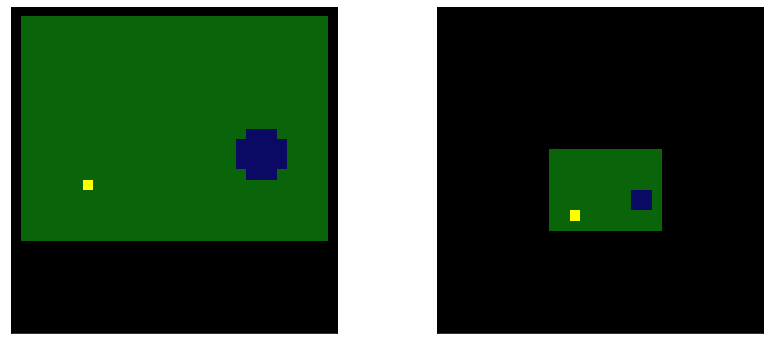

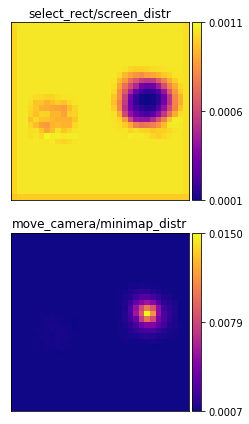


Step 1
Action Patrol_screen - prob : 0.615
Action Attack_screen - prob : 0.283
Action select_army - prob : 0.043
Action Smart_screen - prob : 0.041
Action Attack_minimap - prob : 0.010
-----------------------------------
Action chosen:  Patrol_screen


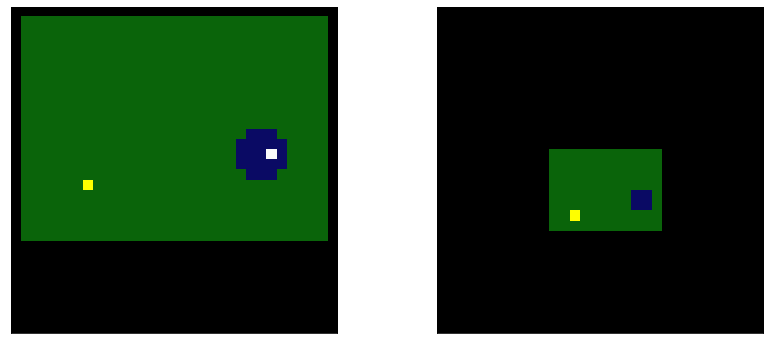

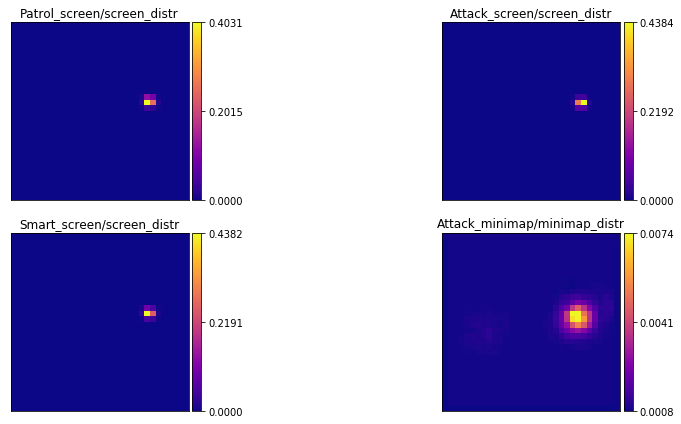


Step 2
Action Patrol_screen - prob : 0.618
Action Attack_screen - prob : 0.282
Action select_army - prob : 0.042
Action Smart_screen - prob : 0.040
Action Attack_minimap - prob : 0.010
-----------------------------------
Action chosen:  Patrol_screen


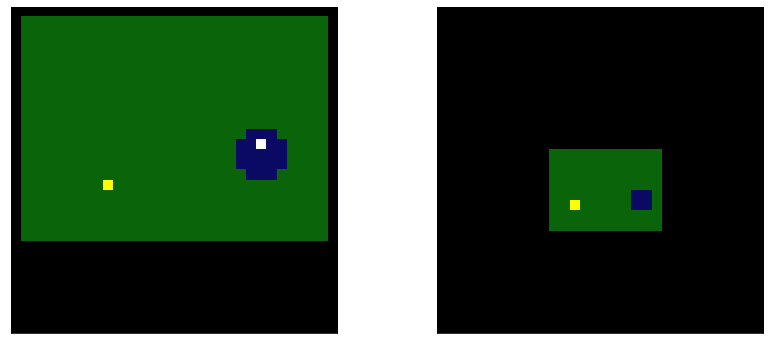

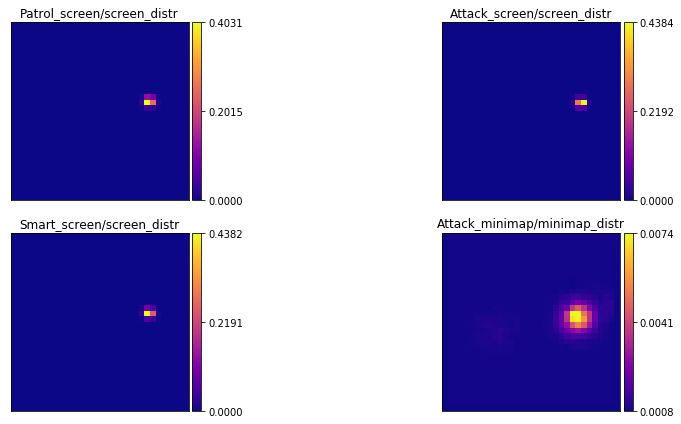


Step 3
Action Patrol_screen - prob : 0.622
Action Attack_screen - prob : 0.281
Action select_army - prob : 0.041
Action Smart_screen - prob : 0.039
Action Attack_minimap - prob : 0.009
-----------------------------------
Action chosen:  Patrol_screen


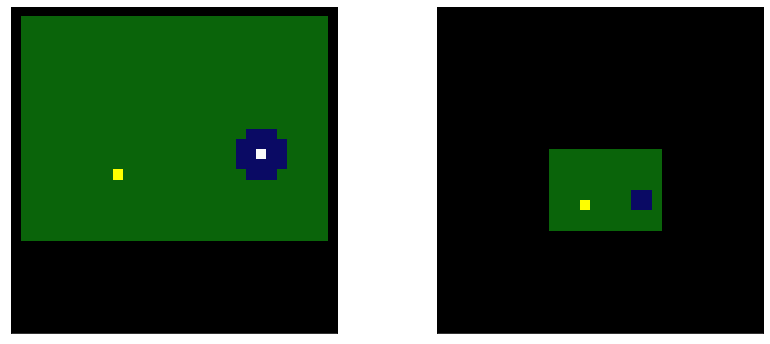

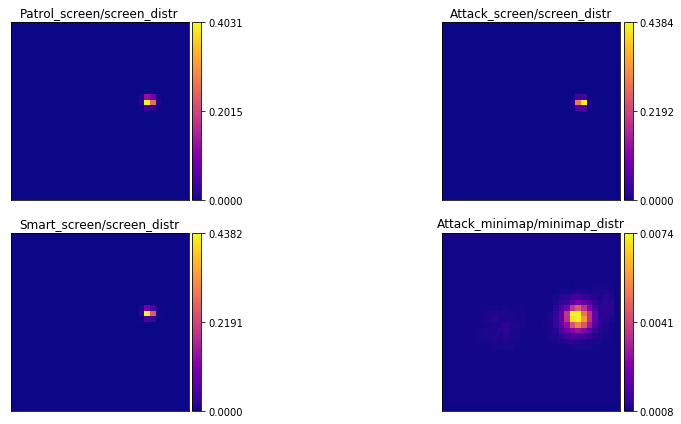


Step 4
Action Patrol_screen - prob : 0.622
Action Attack_screen - prob : 0.282
Action select_army - prob : 0.041
Action Smart_screen - prob : 0.039
Action Attack_minimap - prob : 0.009
-----------------------------------
Action chosen:  select_army


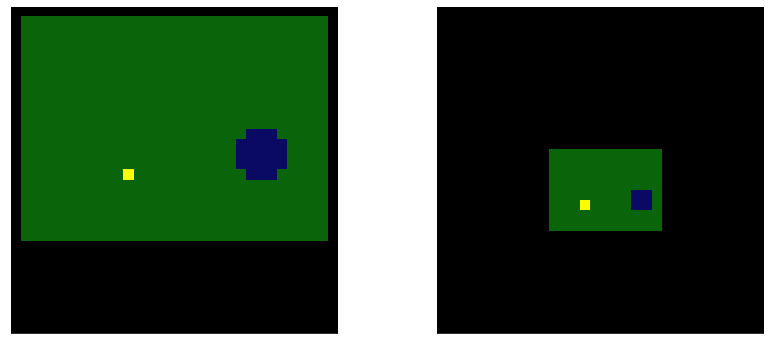

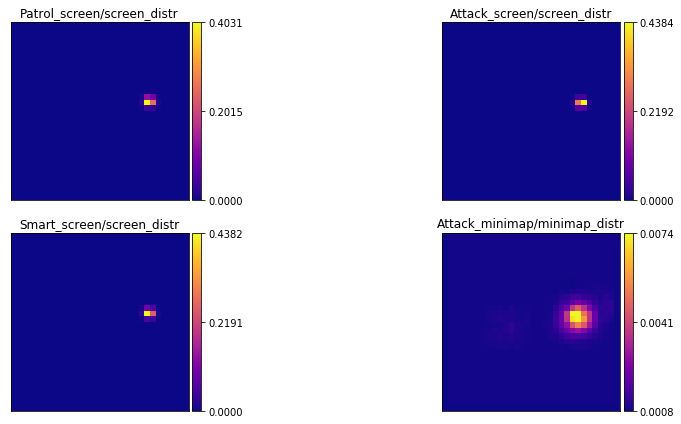


Step 5
Action Patrol_screen - prob : 0.624
Action Attack_screen - prob : 0.282
Action select_army - prob : 0.040
Action Smart_screen - prob : 0.038
Action Attack_minimap - prob : 0.009
-----------------------------------
Action chosen:  select_army


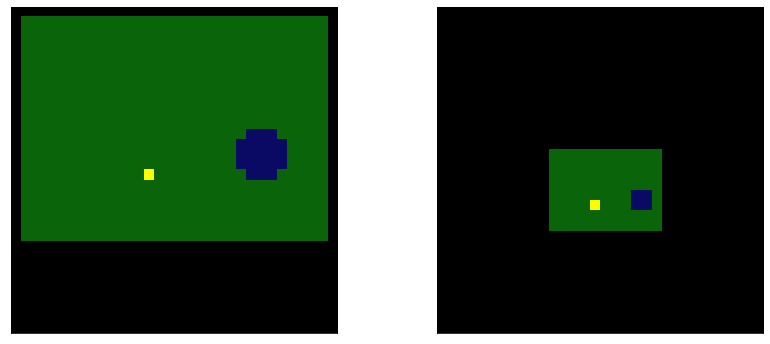

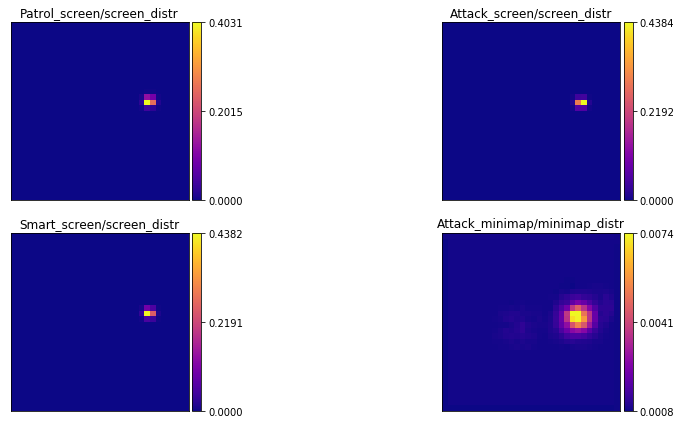


Step 6
Action Patrol_screen - prob : 0.626
Action Attack_screen - prob : 0.282
Action select_army - prob : 0.040
Action Smart_screen - prob : 0.037
Action Attack_minimap - prob : 0.009
-----------------------------------
Action chosen:  Patrol_screen


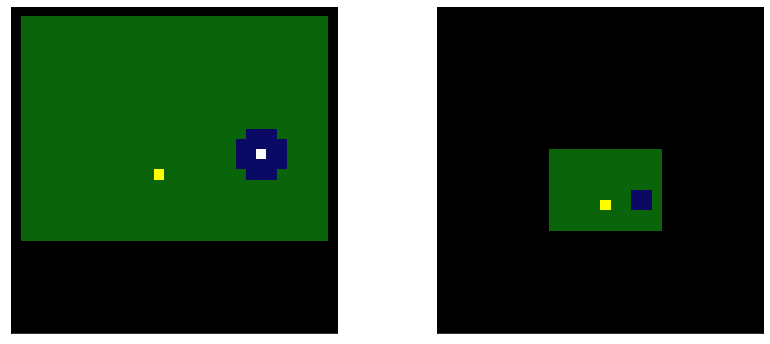

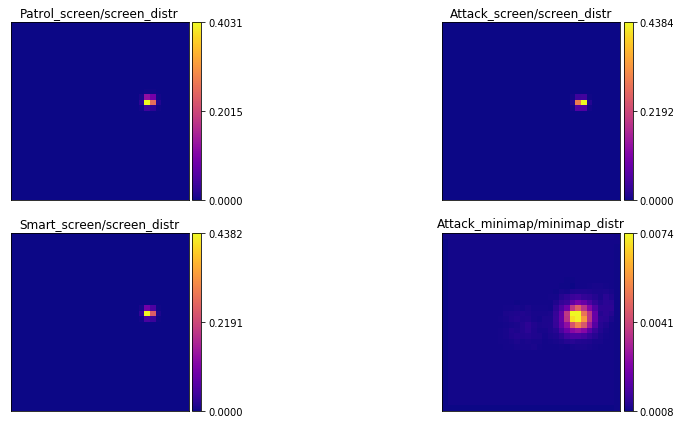


Step 7
Action Patrol_screen - prob : 0.629
Action Attack_screen - prob : 0.281
Action select_army - prob : 0.039
Action Smart_screen - prob : 0.036
Action Attack_minimap - prob : 0.009
-----------------------------------
Action chosen:  Attack_screen


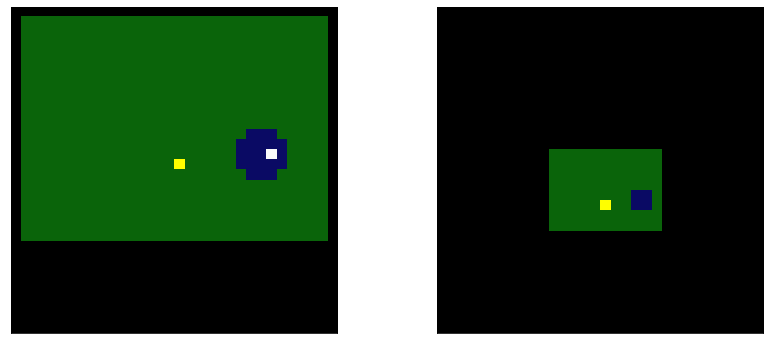

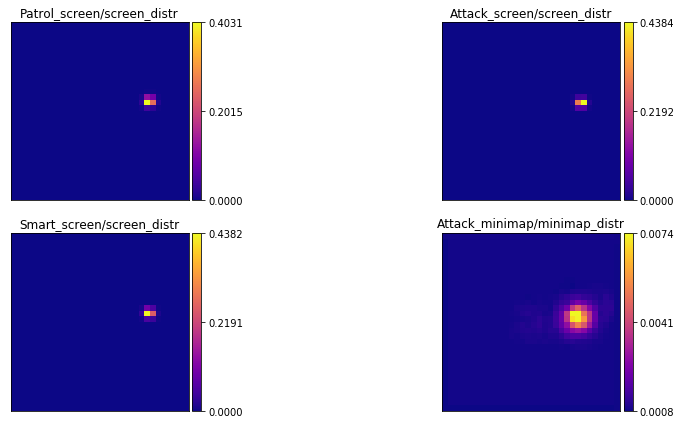


Step 8
Action Patrol_screen - prob : 0.631
Action Attack_screen - prob : 0.281
Action select_army - prob : 0.038
Action Smart_screen - prob : 0.036
Action Attack_minimap - prob : 0.008
-----------------------------------
Action chosen:  Attack_screen


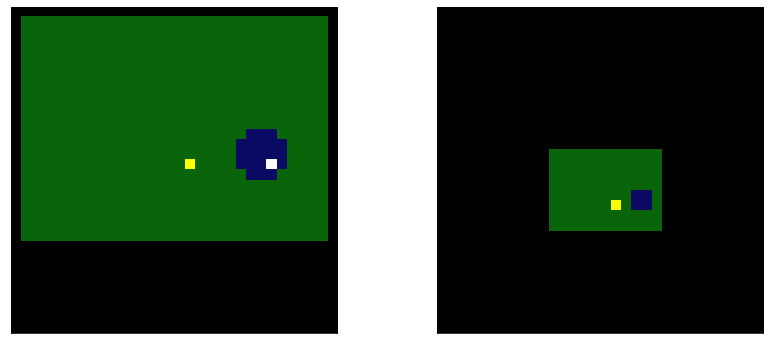

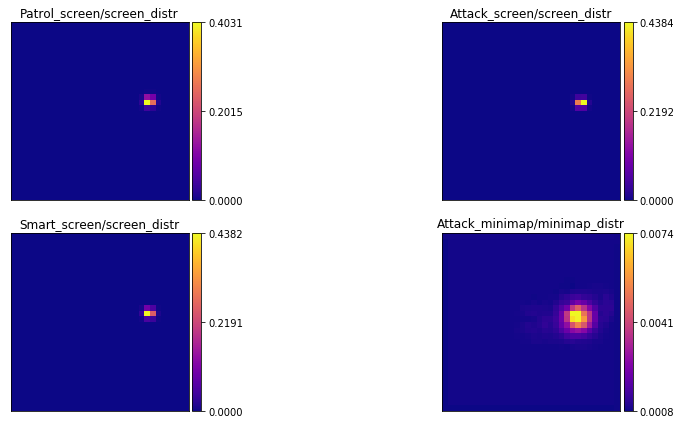


Step 9
Action Patrol_screen - prob : 0.637
Action Attack_screen - prob : 0.279
Action select_army - prob : 0.037
Action Smart_screen - prob : 0.034
Action Attack_minimap - prob : 0.008
-----------------------------------
Action chosen:  select_army


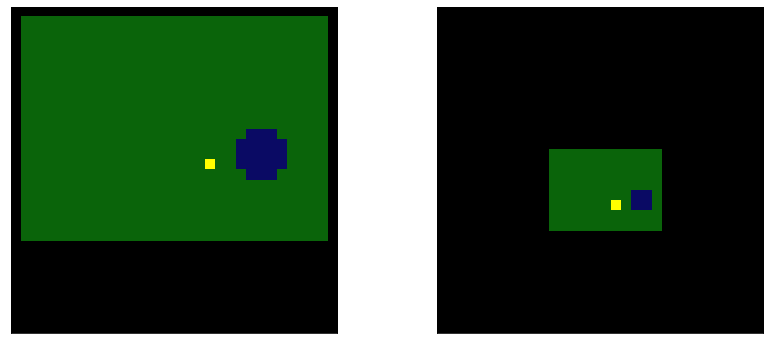

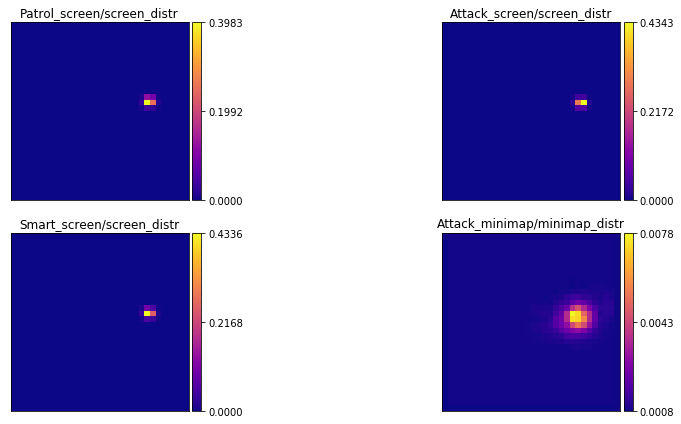


Step 10
Action Patrol_screen - prob : 0.641
Action Attack_screen - prob : 0.277
Action select_army - prob : 0.036
Action Smart_screen - prob : 0.033
Action Attack_minimap - prob : 0.007
-----------------------------------
Action chosen:  Attack_screen


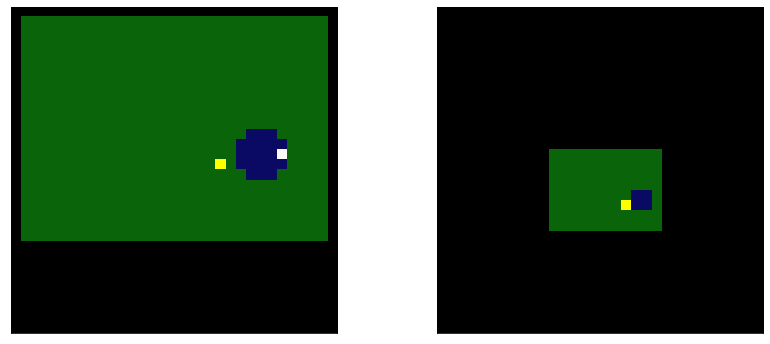

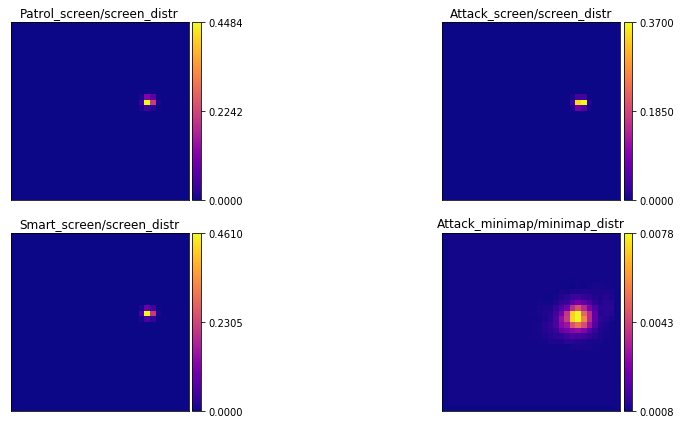


Step 11
Action Patrol_screen - prob : 0.643
Action Attack_screen - prob : 0.276
Action select_army - prob : 0.035
Action Smart_screen - prob : 0.033
Action Attack_minimap - prob : 0.007
-----------------------------------
Action chosen:  Attack_screen


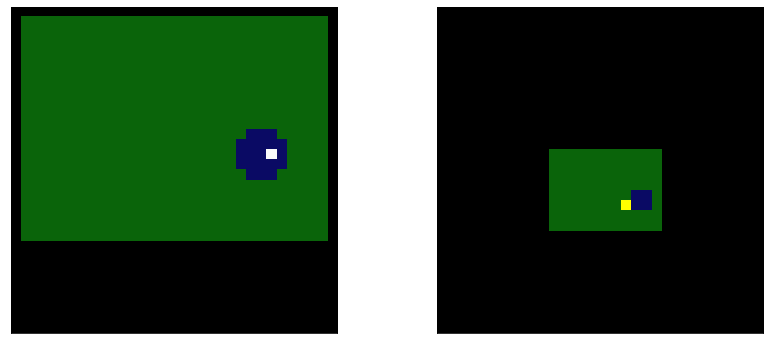

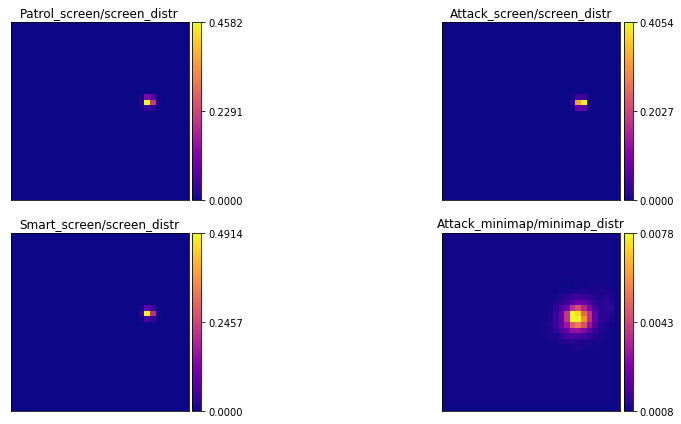


Step 12
Action Patrol_screen - prob : 0.620
Action Attack_screen - prob : 0.276
Action select_army - prob : 0.044
Action Smart_screen - prob : 0.042
Action Attack_minimap - prob : 0.010
-----------------------------------
Action chosen:  Attack_screen


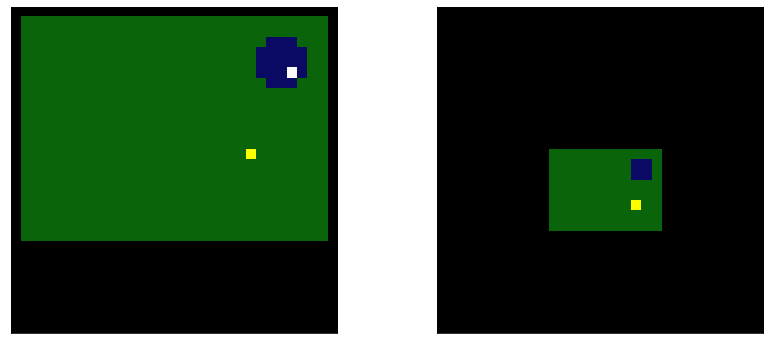

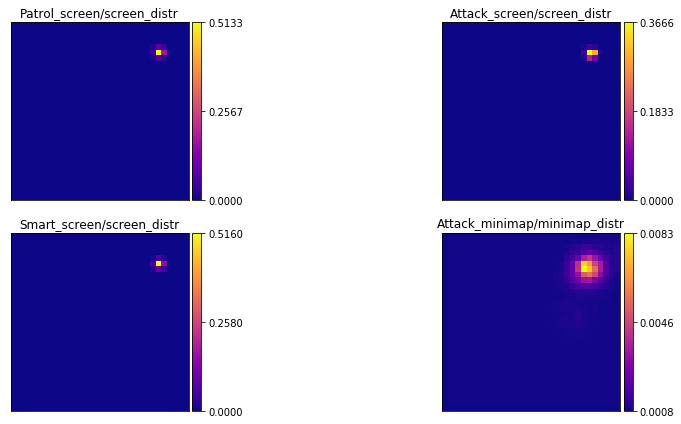


Step 13
Action Patrol_screen - prob : 0.622
Action Attack_screen - prob : 0.275
Action select_army - prob : 0.044
Action Smart_screen - prob : 0.042
Action Attack_minimap - prob : 0.010
-----------------------------------
Action chosen:  Attack_screen


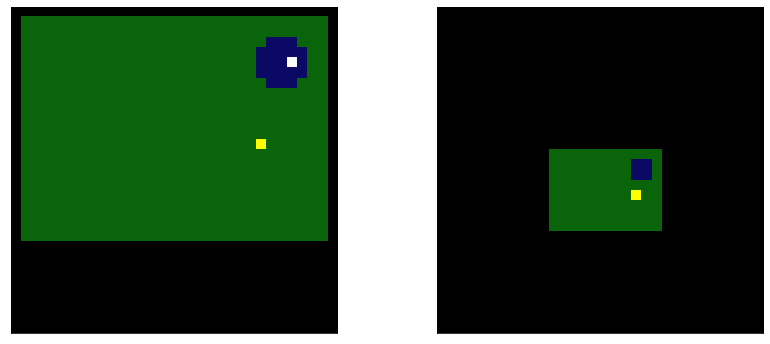

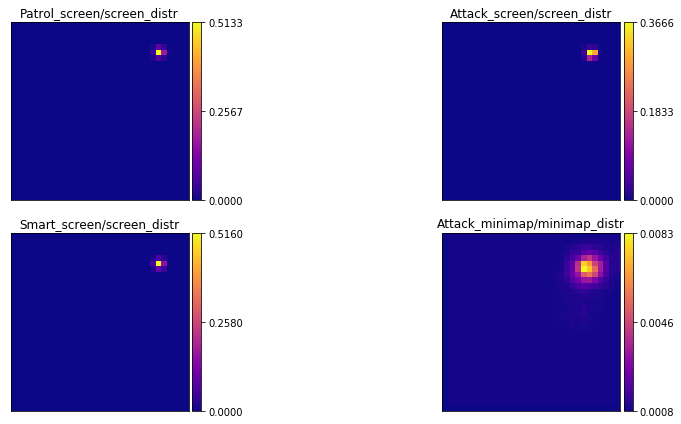


Step 14
Action Patrol_screen - prob : 0.628
Action Attack_screen - prob : 0.274
Action select_army - prob : 0.042
Action Smart_screen - prob : 0.040
Action Attack_minimap - prob : 0.009
-----------------------------------
Action chosen:  Patrol_screen


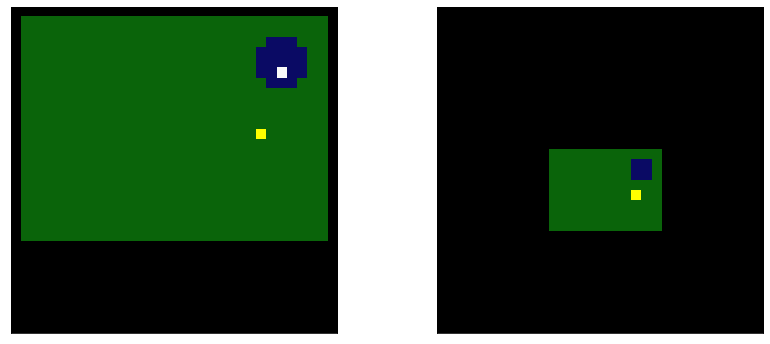

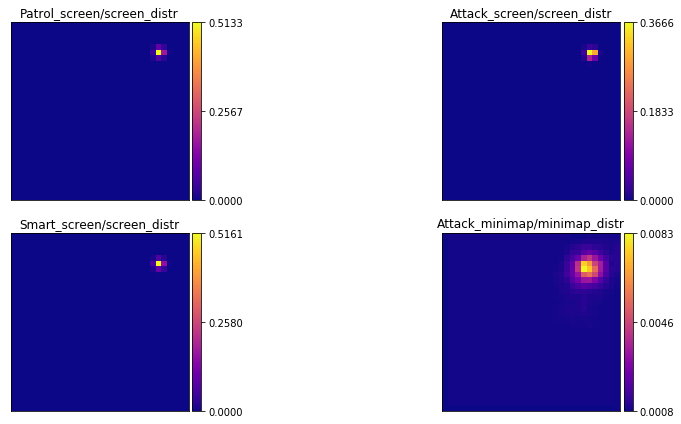


Step 15
Action Patrol_screen - prob : 0.634
Action Attack_screen - prob : 0.273
Action select_army - prob : 0.040
Action Smart_screen - prob : 0.039
Action Attack_minimap - prob : 0.009
-----------------------------------
Action chosen:  Patrol_screen


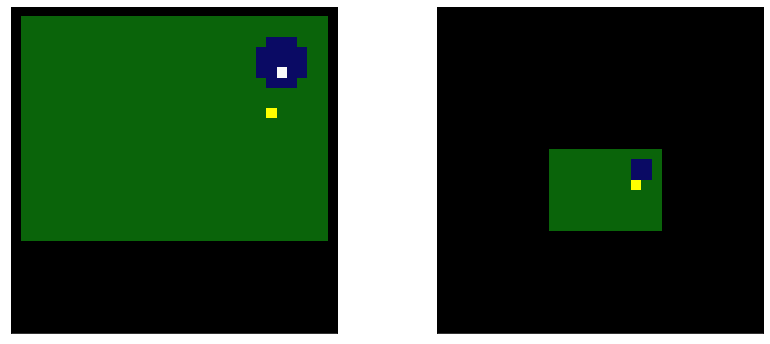

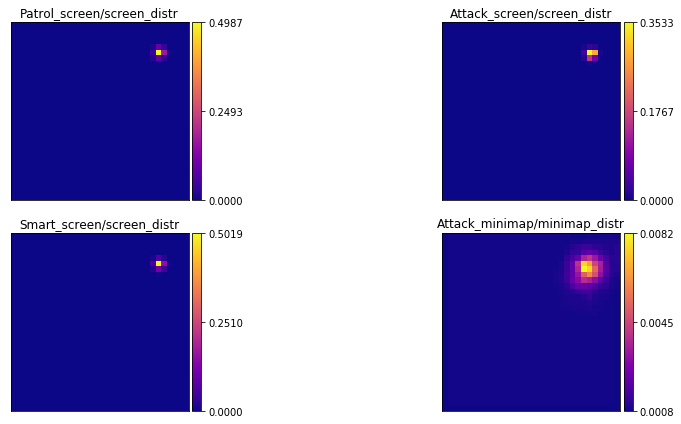


Step 16
Action Patrol_screen - prob : 0.636
Action Attack_screen - prob : 0.272
Action select_army - prob : 0.039
Action Smart_screen - prob : 0.038
Action Attack_minimap - prob : 0.008
-----------------------------------
Action chosen:  Patrol_screen


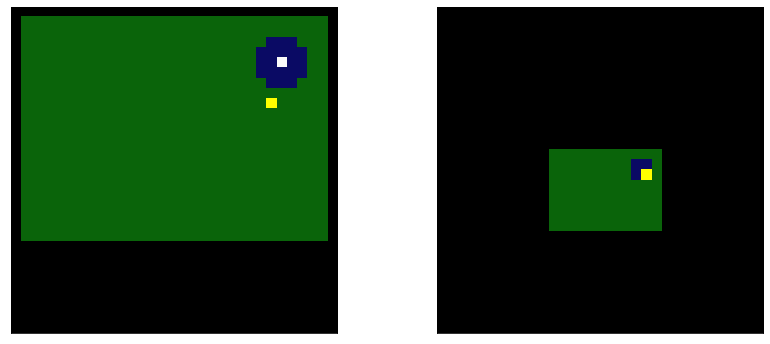

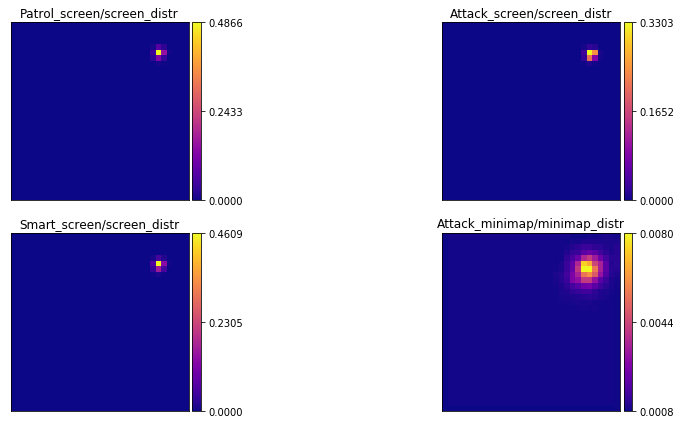


Step 17
Action Patrol_screen - prob : 0.640
Action Attack_screen - prob : 0.271
Action select_army - prob : 0.038
Action Smart_screen - prob : 0.037
Action Attack_minimap - prob : 0.008
-----------------------------------
Action chosen:  Patrol_screen


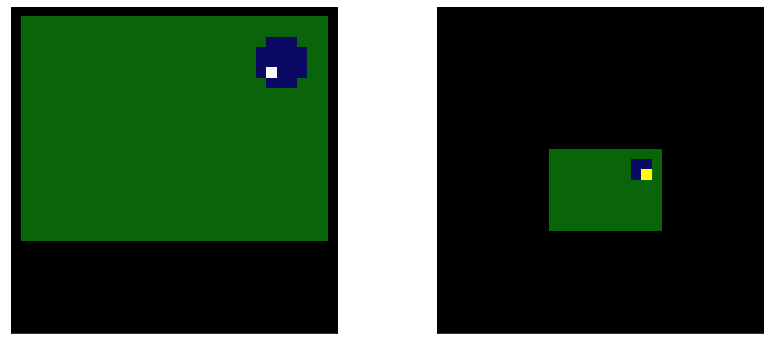

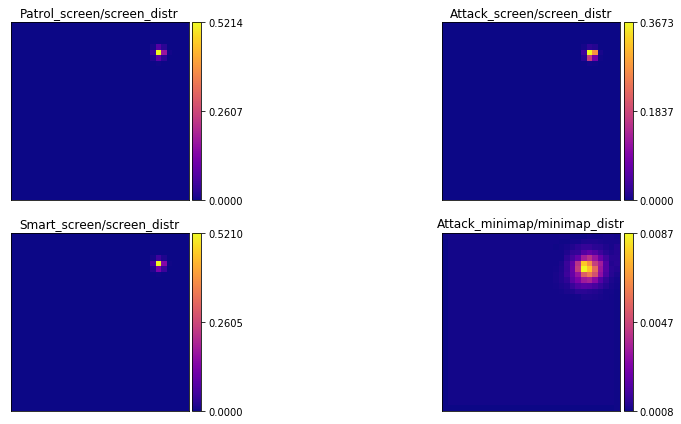


Step 18
Action Patrol_screen - prob : 0.603
Action Attack_screen - prob : 0.292
Action select_army - prob : 0.045
Action Smart_screen - prob : 0.042
Action Attack_minimap - prob : 0.011
-----------------------------------
Action chosen:  Patrol_screen


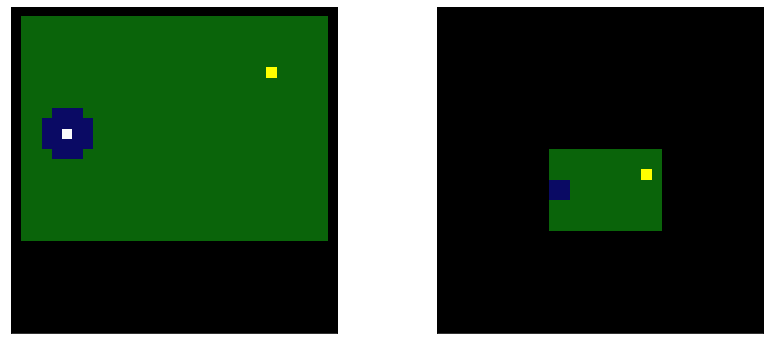

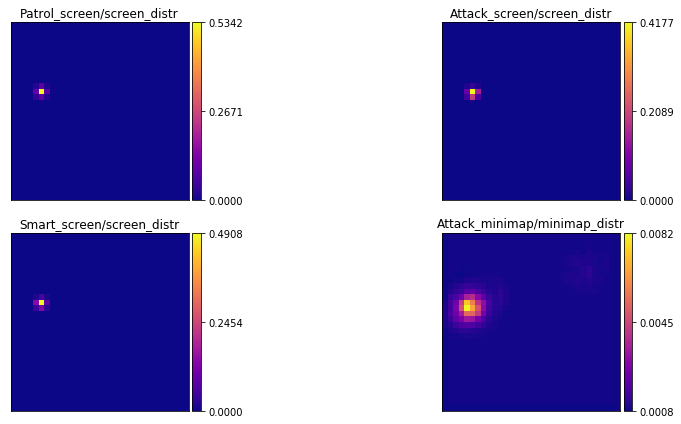


Step 19
Action Patrol_screen - prob : 0.604
Action Attack_screen - prob : 0.291
Action select_army - prob : 0.045
Action Smart_screen - prob : 0.042
Action Attack_minimap - prob : 0.010
-----------------------------------
Action chosen:  Smart_screen


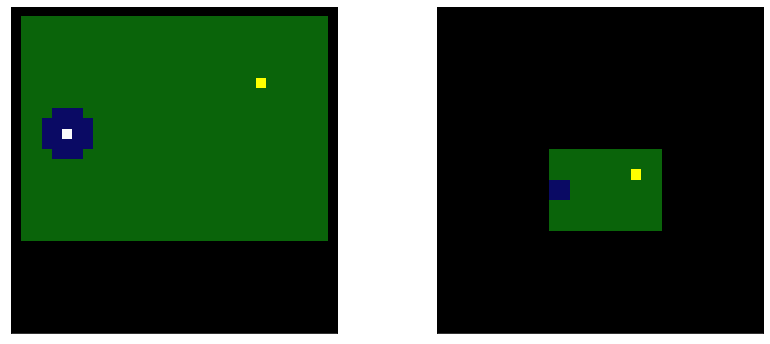

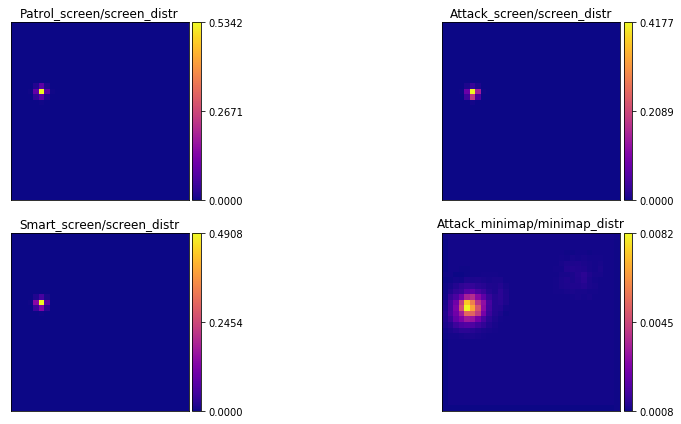


Step 20
Action Patrol_screen - prob : 0.604
Action Attack_screen - prob : 0.292
Action select_army - prob : 0.044
Action Smart_screen - prob : 0.041
Action Attack_minimap - prob : 0.010
-----------------------------------
Action chosen:  Patrol_screen


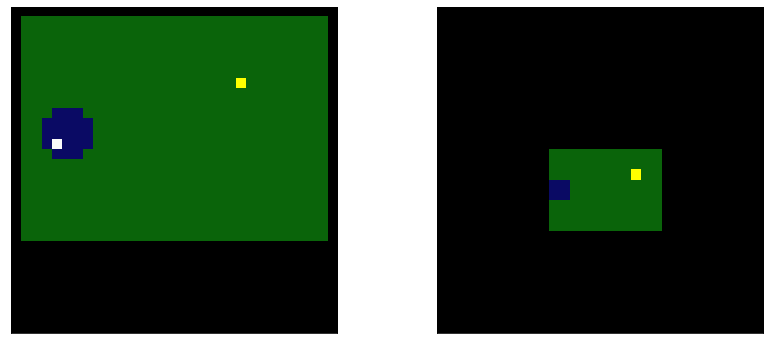

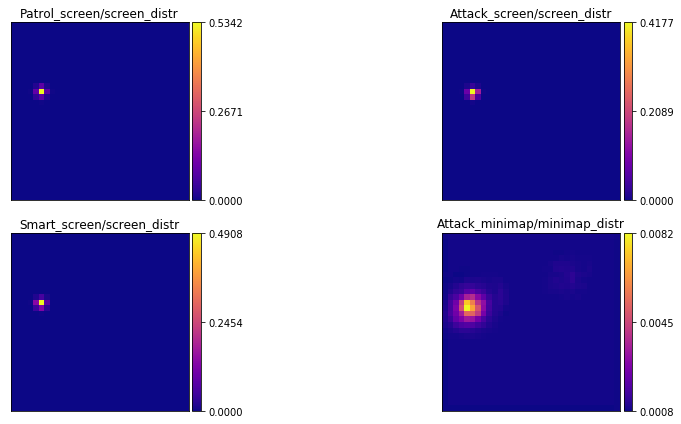


Step 21
Action Patrol_screen - prob : 0.607
Action Attack_screen - prob : 0.292
Action select_army - prob : 0.044
Action Smart_screen - prob : 0.040
Action Attack_minimap - prob : 0.010
-----------------------------------
Action chosen:  Attack_screen


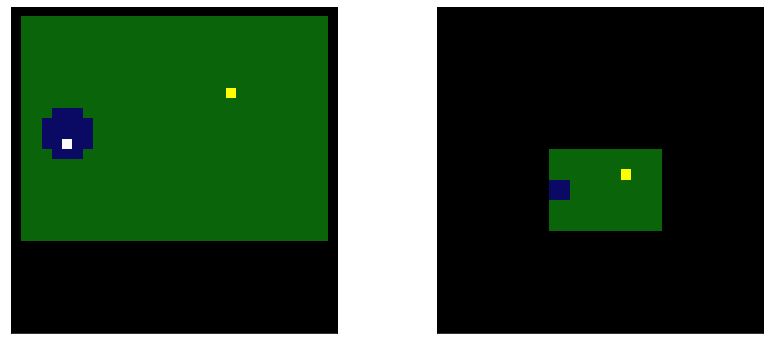

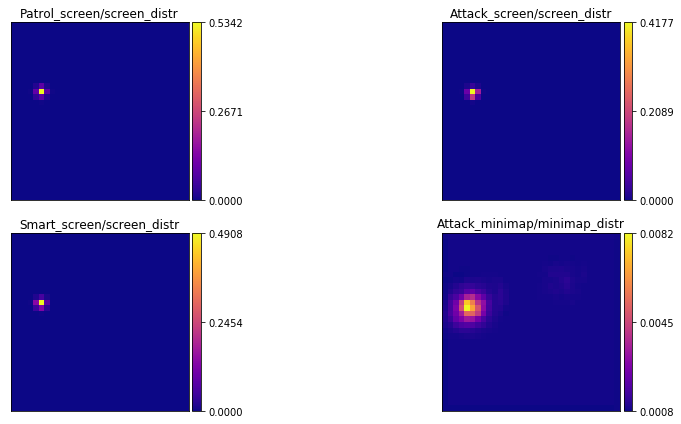


Step 22
Action Patrol_screen - prob : 0.609
Action Attack_screen - prob : 0.292
Action select_army - prob : 0.043
Action Smart_screen - prob : 0.040
Action Attack_minimap - prob : 0.010
-----------------------------------
Action chosen:  Smart_screen


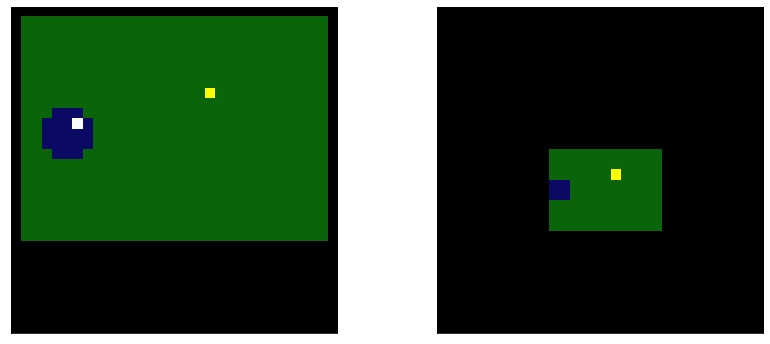

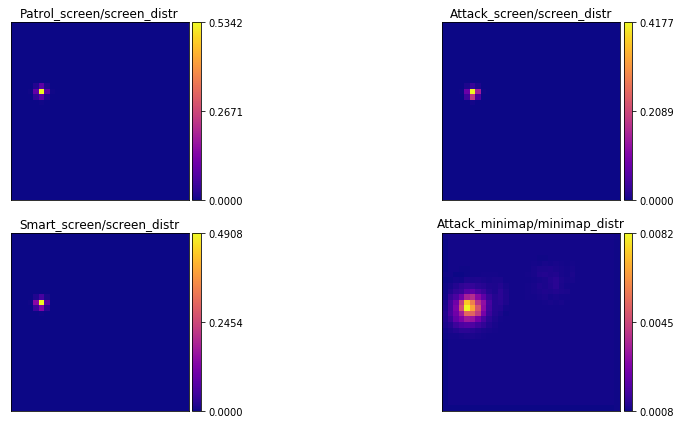


Step 23
Action Patrol_screen - prob : 0.611
Action Attack_screen - prob : 0.291
Action select_army - prob : 0.042
Action Smart_screen - prob : 0.039
Action Attack_minimap - prob : 0.010
-----------------------------------
Action chosen:  Patrol_screen


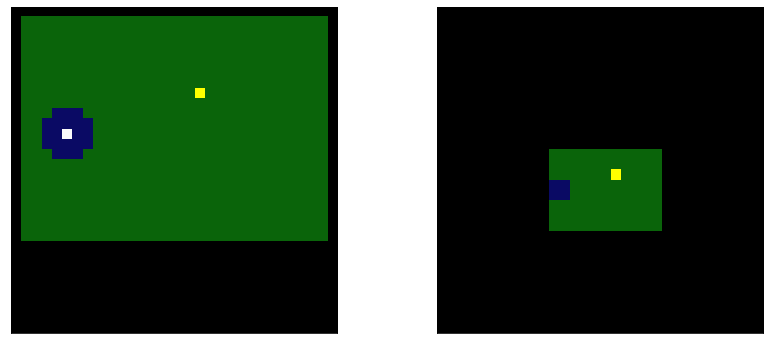

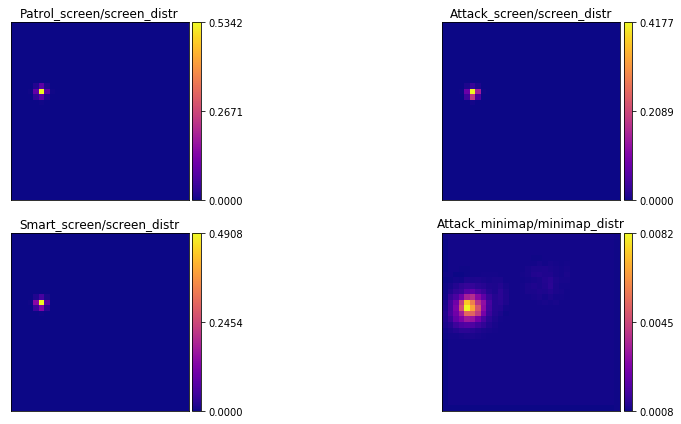


Step 24
Action Patrol_screen - prob : 0.612
Action Attack_screen - prob : 0.291
Action select_army - prob : 0.042
Action Smart_screen - prob : 0.039
Action Attack_minimap - prob : 0.009
-----------------------------------
Action chosen:  select_army


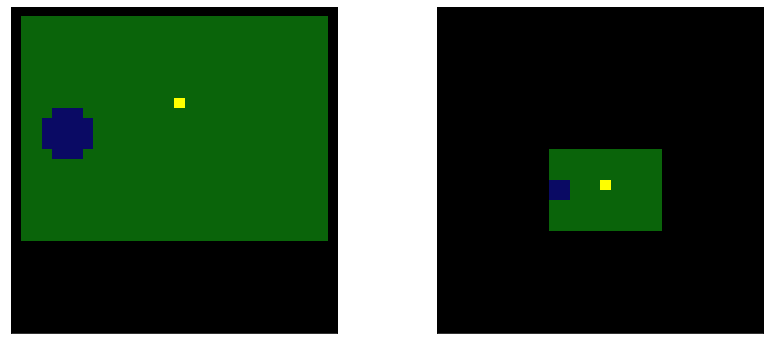

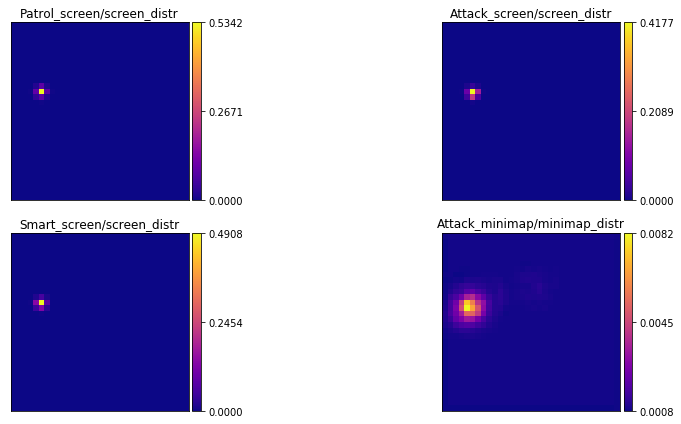


Step 25
Action Patrol_screen - prob : 0.612
Action Attack_screen - prob : 0.291
Action select_army - prob : 0.042
Action Smart_screen - prob : 0.039
Action Attack_minimap - prob : 0.010
-----------------------------------
Action chosen:  Patrol_screen


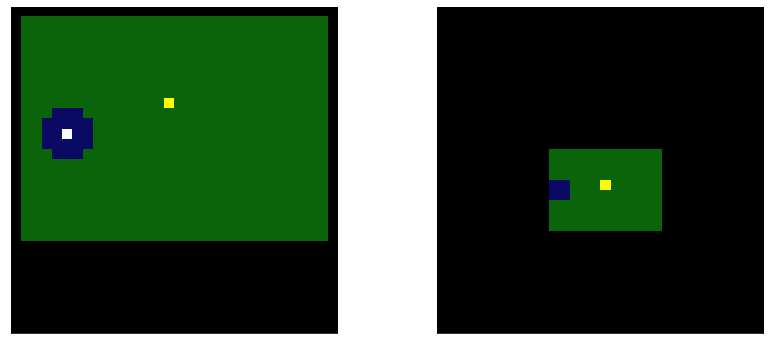

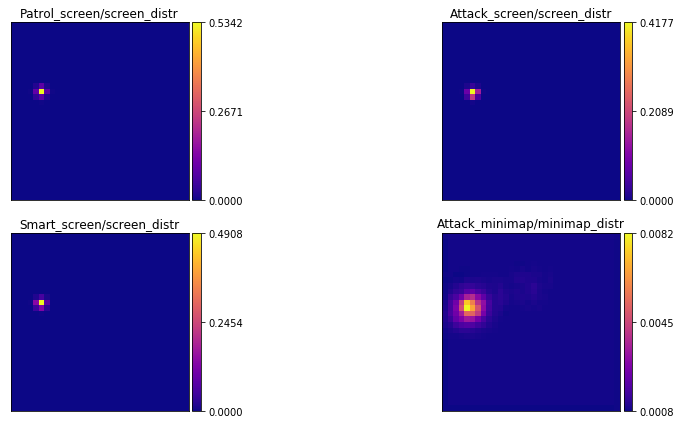


Step 26
Action Patrol_screen - prob : 0.615
Action Attack_screen - prob : 0.290
Action select_army - prob : 0.041
Action Smart_screen - prob : 0.038
Action Attack_minimap - prob : 0.009
-----------------------------------
Action chosen:  Patrol_screen


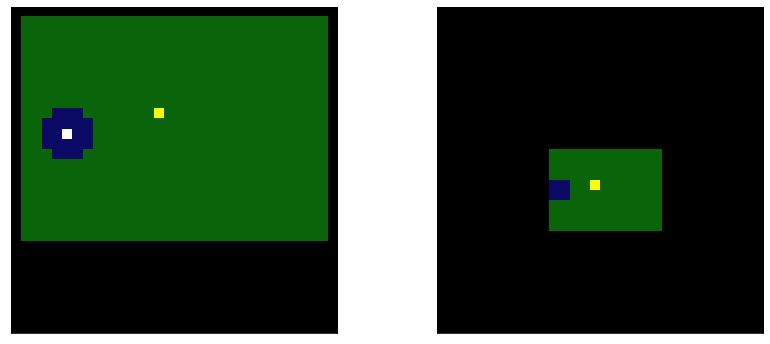

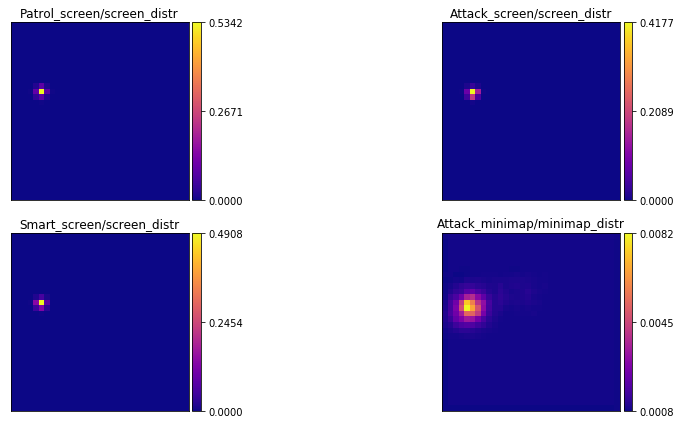


Step 27
Action Patrol_screen - prob : 0.619
Action Attack_screen - prob : 0.289
Action select_army - prob : 0.040
Action Smart_screen - prob : 0.037
Action Attack_minimap - prob : 0.009
-----------------------------------
Action chosen:  Patrol_screen


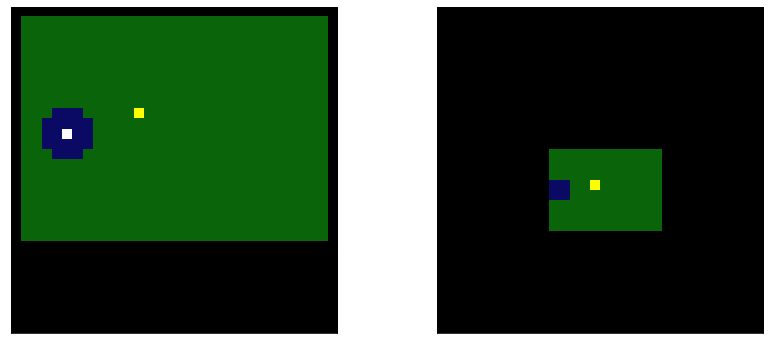

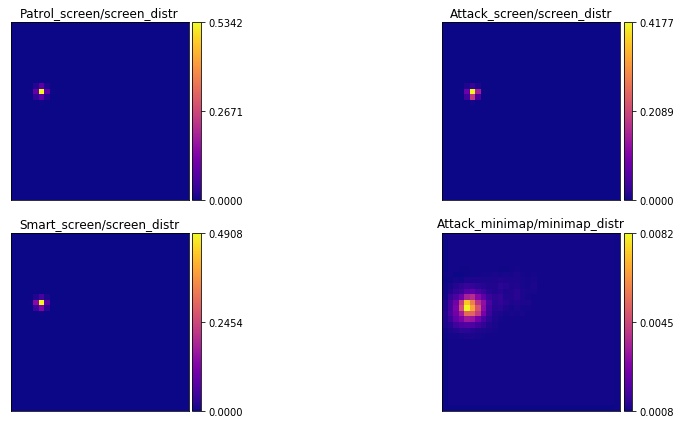


Step 28
Action Patrol_screen - prob : 0.621
Action Attack_screen - prob : 0.288
Action select_army - prob : 0.039
Action Smart_screen - prob : 0.036
Action Attack_minimap - prob : 0.009
-----------------------------------
Action chosen:  Patrol_screen


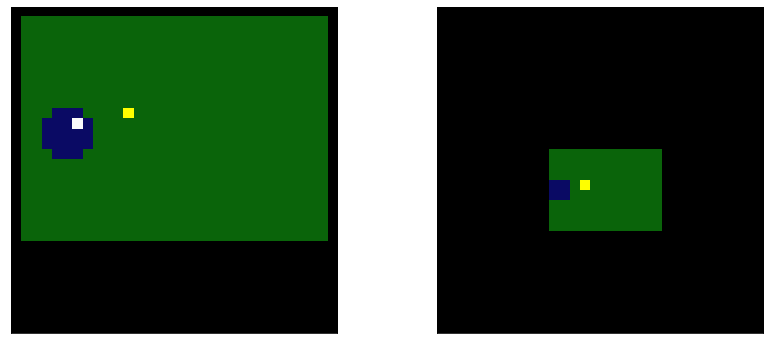

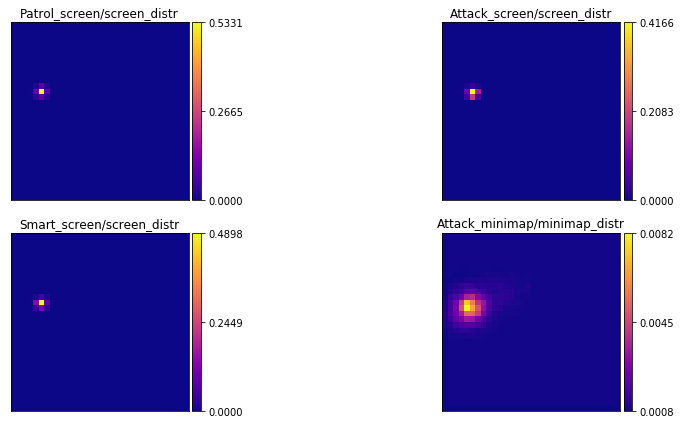


Step 29
Action Patrol_screen - prob : 0.628
Action Attack_screen - prob : 0.287
Action select_army - prob : 0.037
Action Smart_screen - prob : 0.035
Action Attack_minimap - prob : 0.008
-----------------------------------
Action chosen:  Patrol_screen


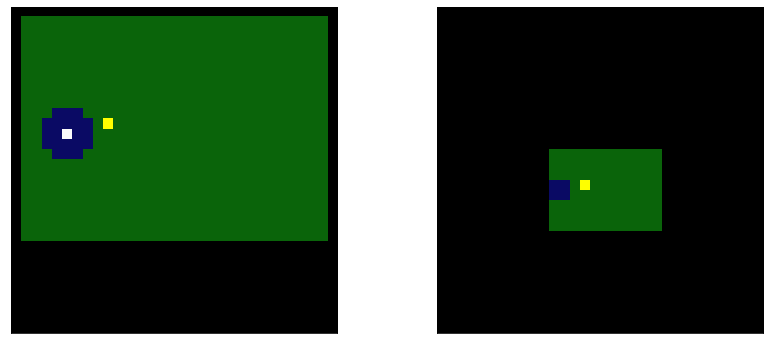

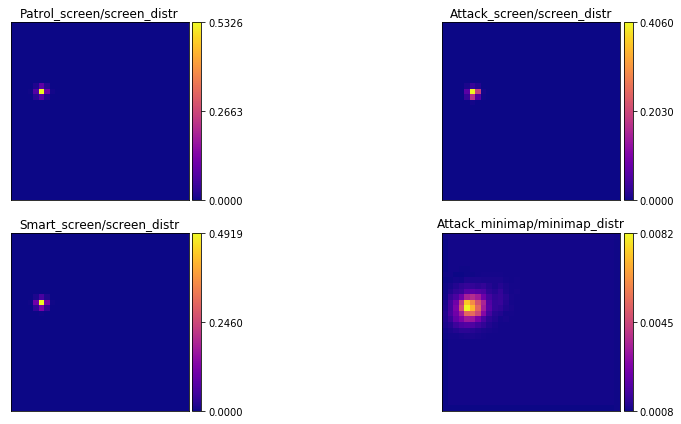


Step 30
Action Patrol_screen - prob : 0.630
Action Attack_screen - prob : 0.287
Action select_army - prob : 0.037
Action Smart_screen - prob : 0.034
Action Attack_minimap - prob : 0.008
-----------------------------------
Action chosen:  Patrol_screen


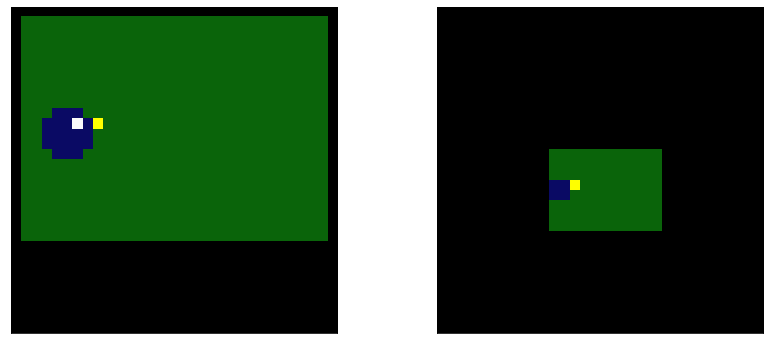

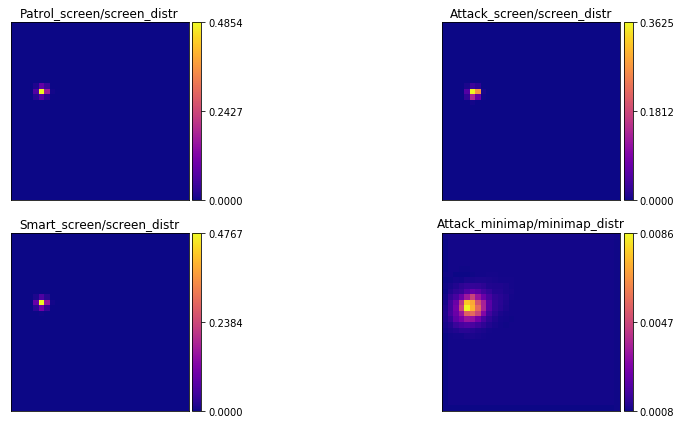


Step 31
Action Patrol_screen - prob : 0.629
Action Attack_screen - prob : 0.287
Action select_army - prob : 0.037
Action Smart_screen - prob : 0.034
Action Attack_minimap - prob : 0.008
-----------------------------------
Action chosen:  Patrol_screen


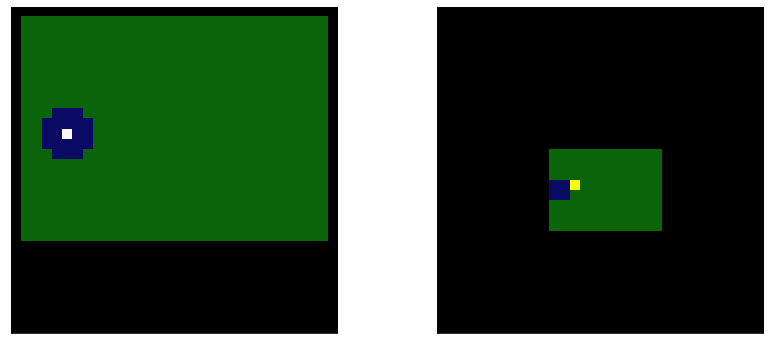

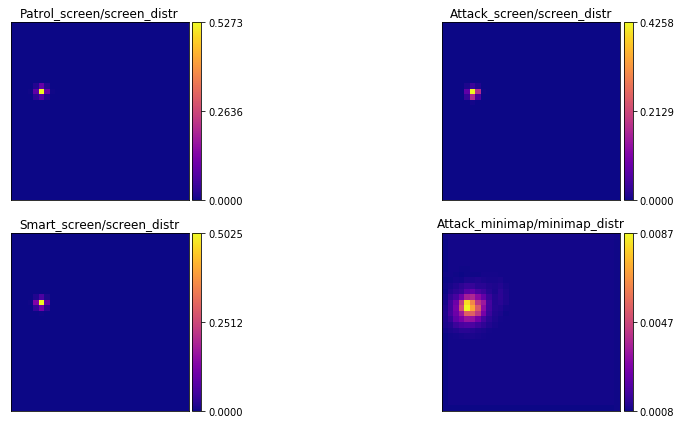


Step 32
Action Patrol_screen - prob : 0.595
Action Attack_screen - prob : 0.308
Action select_army - prob : 0.042
Action Smart_screen - prob : 0.039
Action Attack_minimap - prob : 0.009
-----------------------------------
Action chosen:  Attack_screen


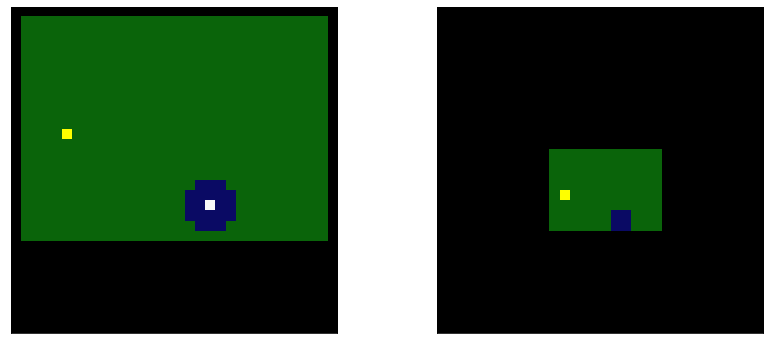

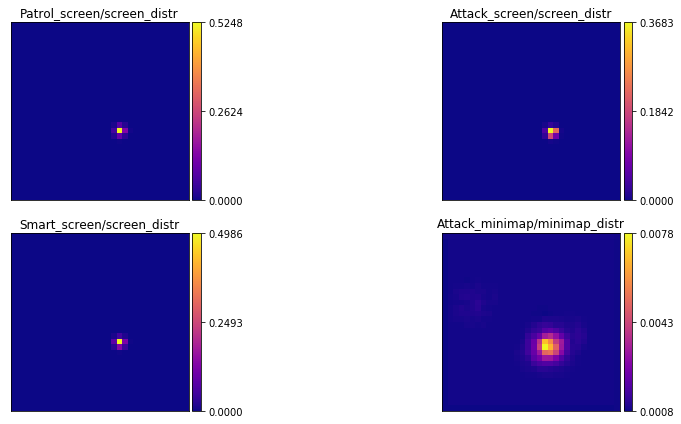


Step 33
Action Patrol_screen - prob : 0.594
Action Attack_screen - prob : 0.309
Action select_army - prob : 0.042
Action Smart_screen - prob : 0.040
Action Attack_minimap - prob : 0.009
-----------------------------------
Action chosen:  Patrol_screen


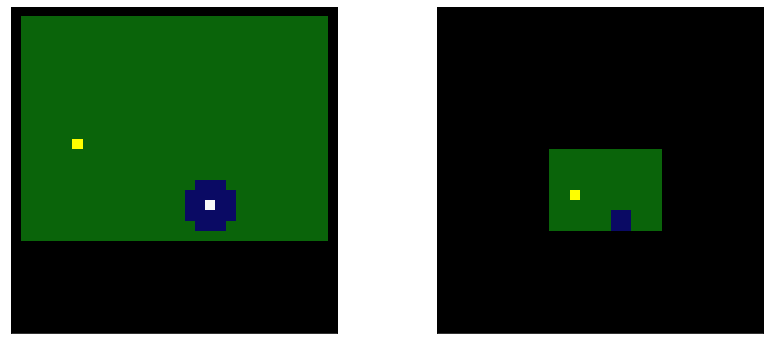

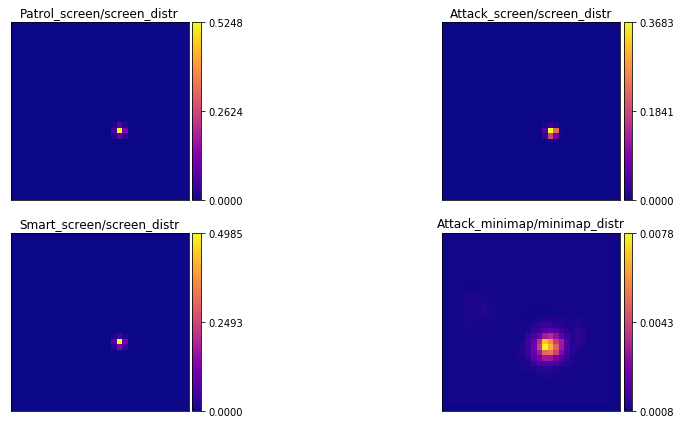


Step 34
Action Patrol_screen - prob : 0.595
Action Attack_screen - prob : 0.307
Action select_army - prob : 0.042
Action Smart_screen - prob : 0.040
Action Attack_minimap - prob : 0.009
-----------------------------------
Action chosen:  Attack_screen


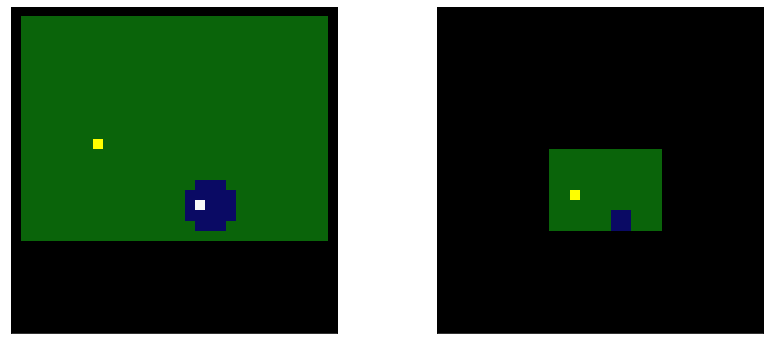

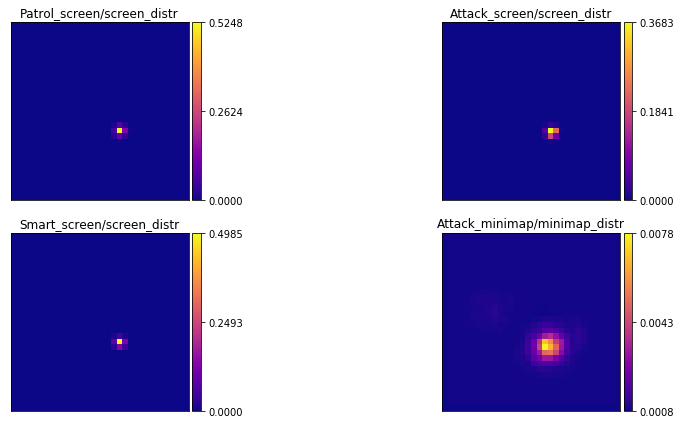


Step 35
Action Patrol_screen - prob : 0.595
Action Attack_screen - prob : 0.308
Action select_army - prob : 0.042
Action Smart_screen - prob : 0.039
Action Attack_minimap - prob : 0.009
-----------------------------------
Action chosen:  Patrol_screen


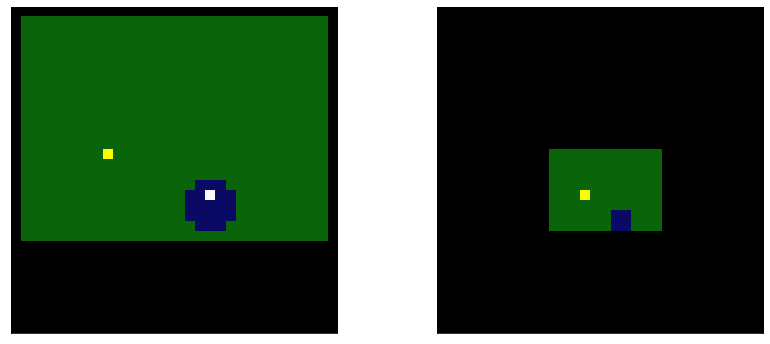

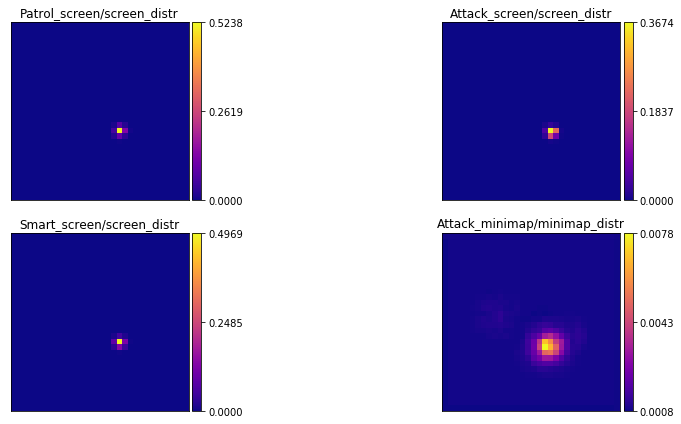


Step 36
Action Patrol_screen - prob : 0.597
Action Attack_screen - prob : 0.309
Action select_army - prob : 0.041
Action Smart_screen - prob : 0.039
Action Attack_minimap - prob : 0.009
-----------------------------------
Action chosen:  Patrol_screen


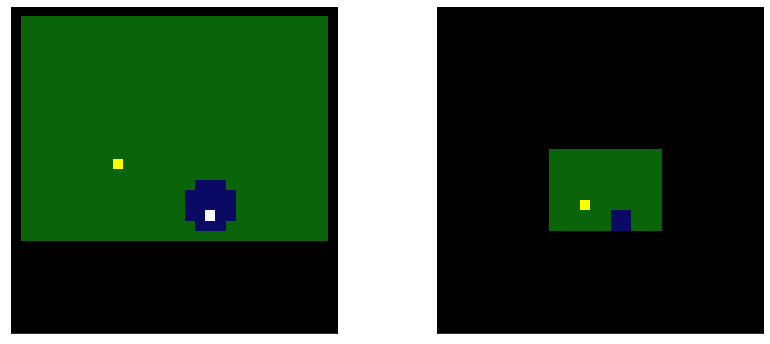

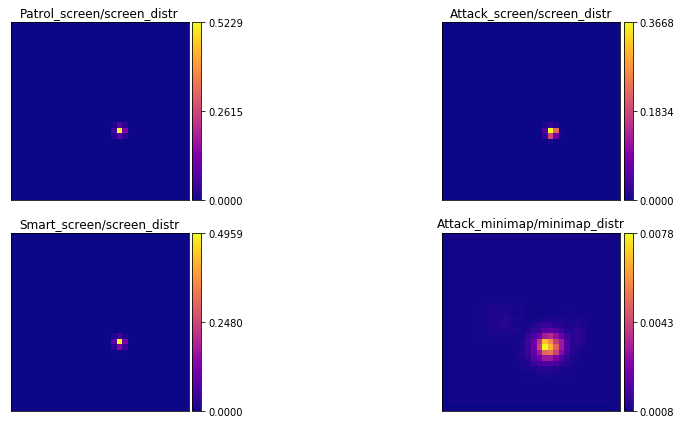


Step 37
Action Patrol_screen - prob : 0.602
Action Attack_screen - prob : 0.308
Action select_army - prob : 0.039
Action Smart_screen - prob : 0.037
Action Attack_minimap - prob : 0.008
-----------------------------------
Action chosen:  Patrol_screen


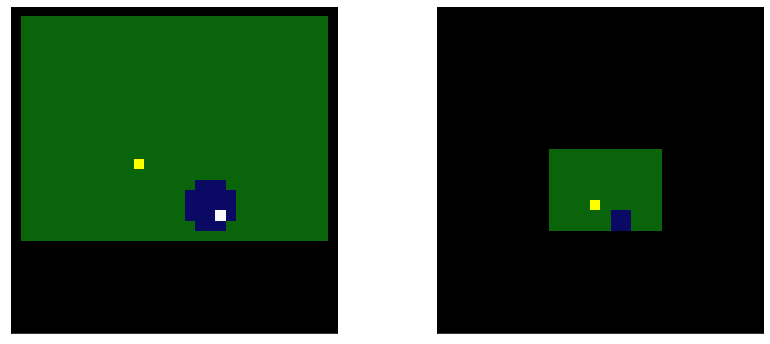

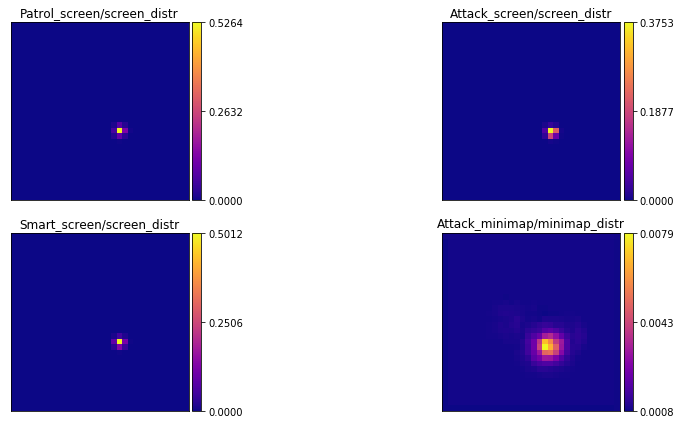


Step 38
Action Patrol_screen - prob : 0.604
Action Attack_screen - prob : 0.308
Action select_army - prob : 0.038
Action Smart_screen - prob : 0.036
Action Attack_minimap - prob : 0.008
-----------------------------------
Action chosen:  Patrol_screen


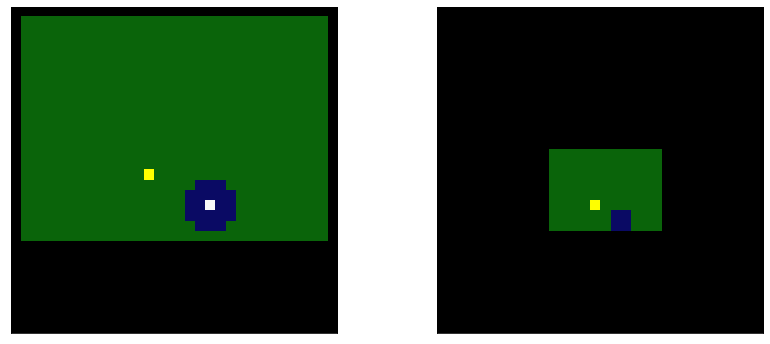

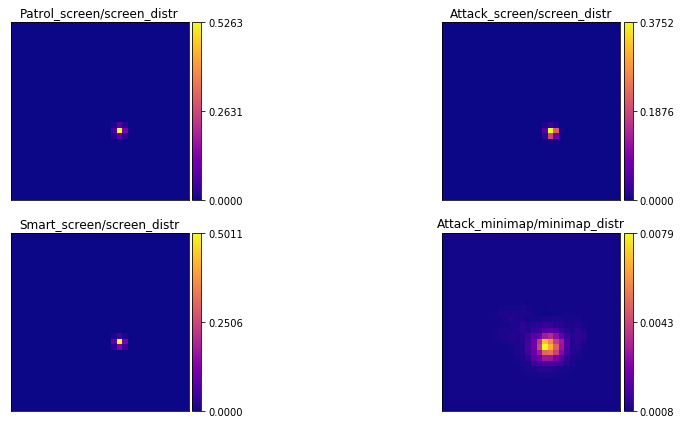


Step 39
Action Patrol_screen - prob : 0.608
Action Attack_screen - prob : 0.308
Action select_army - prob : 0.037
Action Smart_screen - prob : 0.034
Action Attack_minimap - prob : 0.007
-----------------------------------
Action chosen:  Patrol_screen


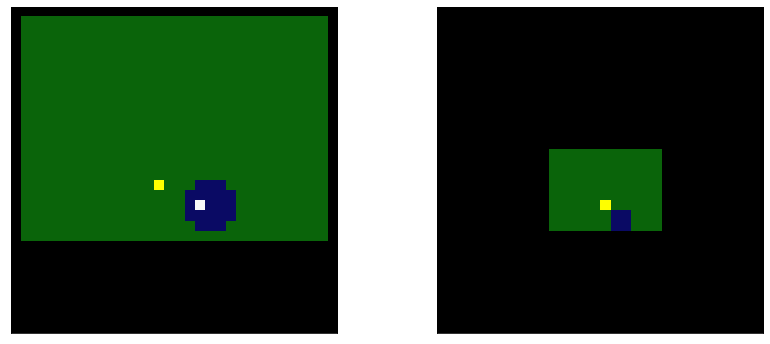

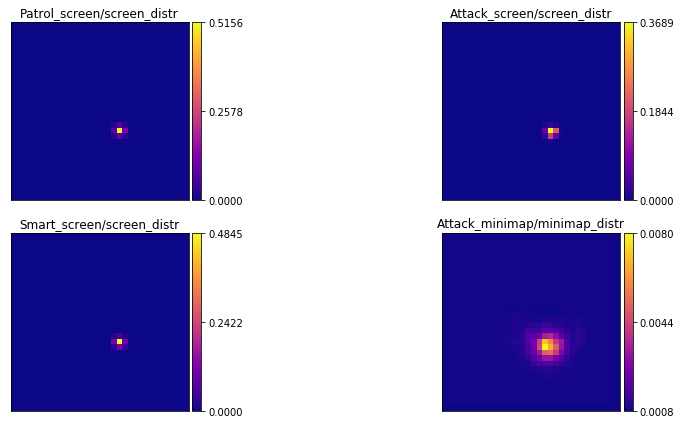


Step 40
Action Patrol_screen - prob : 0.615
Action Attack_screen - prob : 0.306
Action select_army - prob : 0.035
Action Smart_screen - prob : 0.033
Action Attack_minimap - prob : 0.007
-----------------------------------
Action chosen:  Patrol_screen


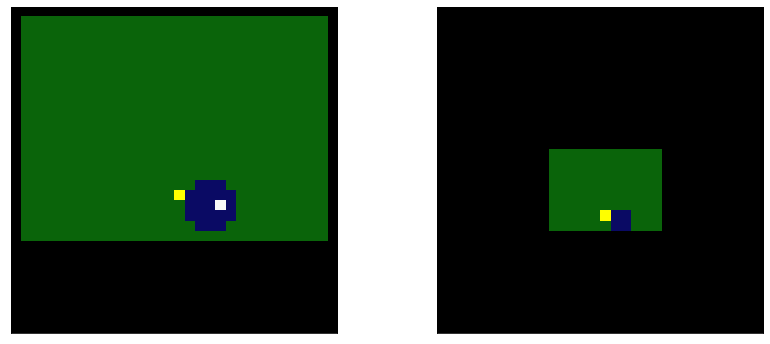

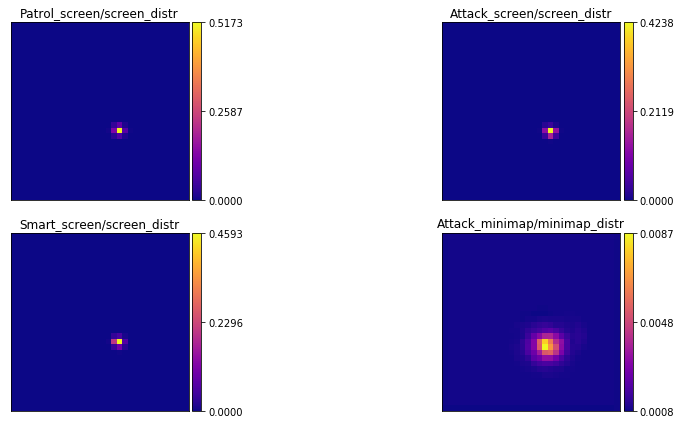


Step 41
Action Patrol_screen - prob : 0.616
Action Attack_screen - prob : 0.305
Action select_army - prob : 0.035
Action Smart_screen - prob : 0.033
Action Attack_minimap - prob : 0.007
-----------------------------------
Action chosen:  Patrol_screen


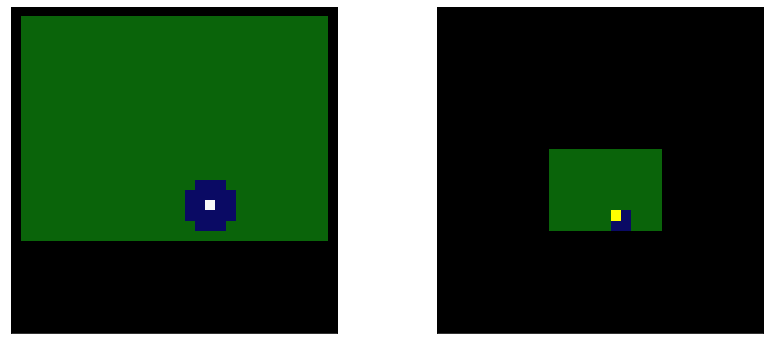

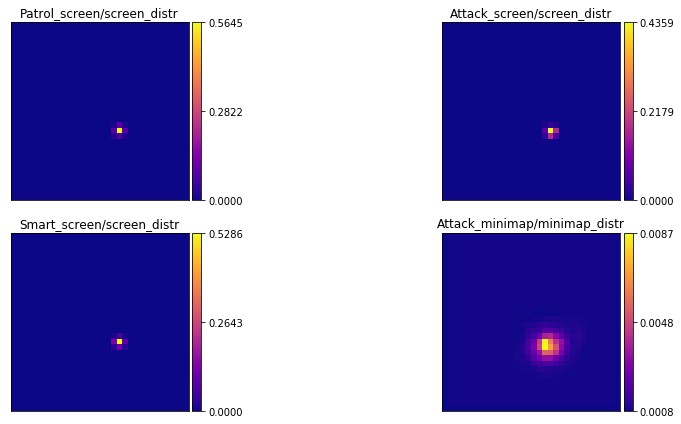


Step 42
Action Patrol_screen - prob : 0.613
Action Attack_screen - prob : 0.289
Action select_army - prob : 0.042
Action Smart_screen - prob : 0.040
Action Attack_minimap - prob : 0.009
-----------------------------------
Action chosen:  Attack_screen


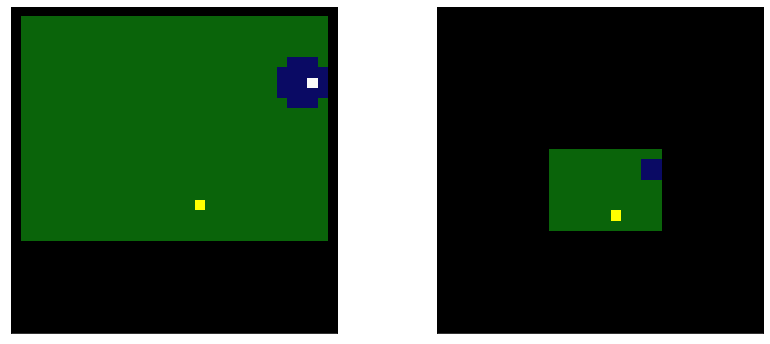

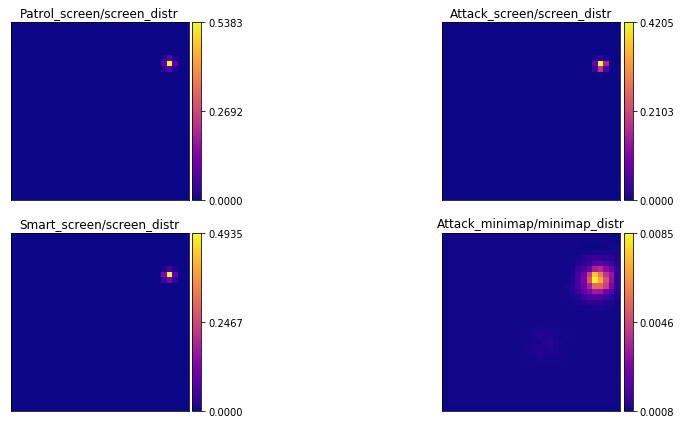


Step 43
Action Patrol_screen - prob : 0.612
Action Attack_screen - prob : 0.289
Action select_army - prob : 0.042
Action Smart_screen - prob : 0.040
Action Attack_minimap - prob : 0.009
-----------------------------------
Action chosen:  Smart_screen


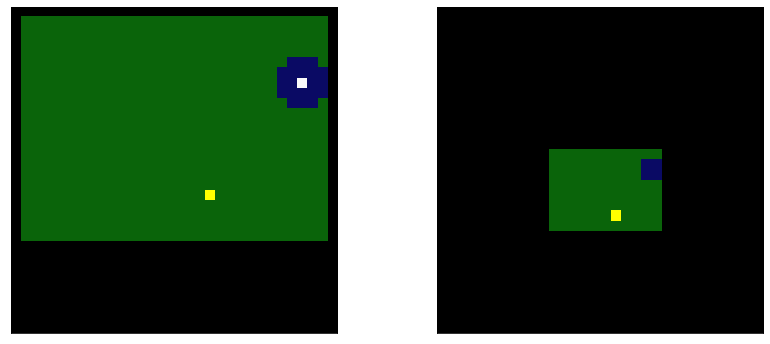

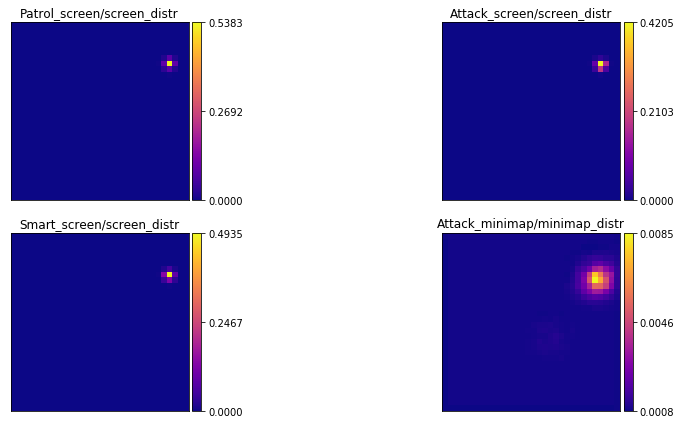


Step 44
Action Patrol_screen - prob : 0.614
Action Attack_screen - prob : 0.286
Action select_army - prob : 0.043
Action Smart_screen - prob : 0.041
Action Attack_minimap - prob : 0.009
-----------------------------------
Action chosen:  Patrol_screen


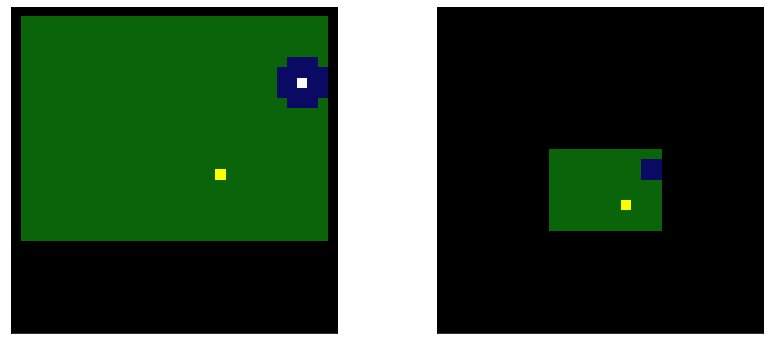

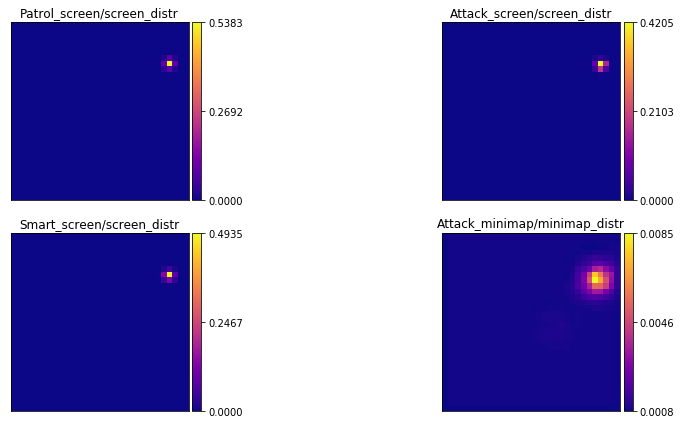


Step 45
Action Patrol_screen - prob : 0.612
Action Attack_screen - prob : 0.286
Action select_army - prob : 0.044
Action Smart_screen - prob : 0.041
Action Attack_minimap - prob : 0.010
-----------------------------------
Action chosen:  Patrol_screen


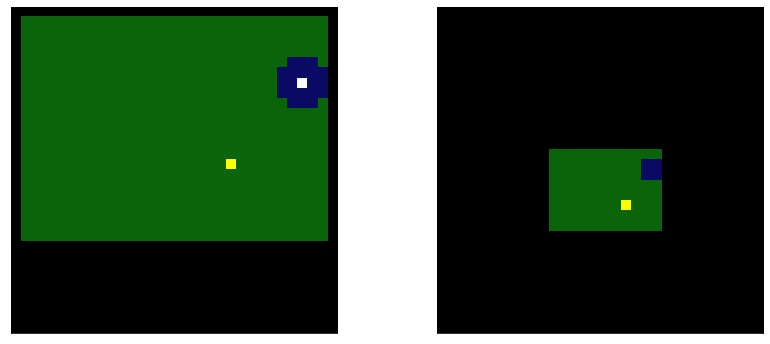

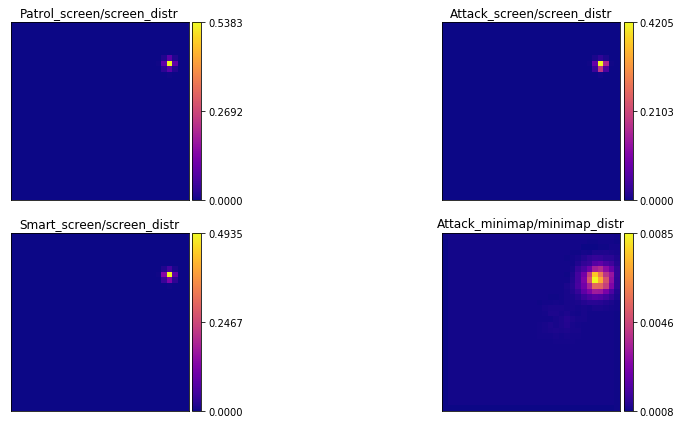


Step 46
Action Patrol_screen - prob : 0.615
Action Attack_screen - prob : 0.285
Action select_army - prob : 0.043
Action Smart_screen - prob : 0.041
Action Attack_minimap - prob : 0.009
-----------------------------------
Action chosen:  Attack_screen


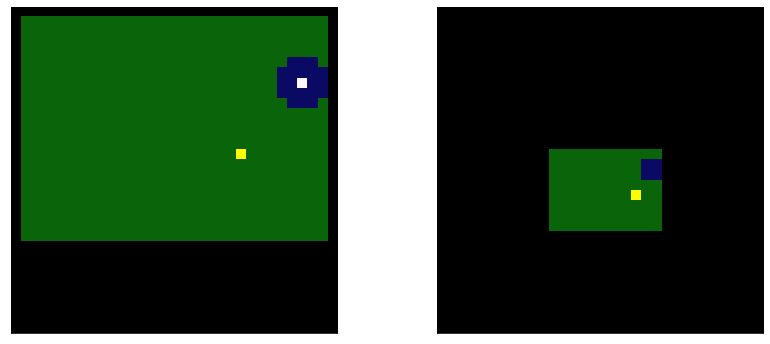

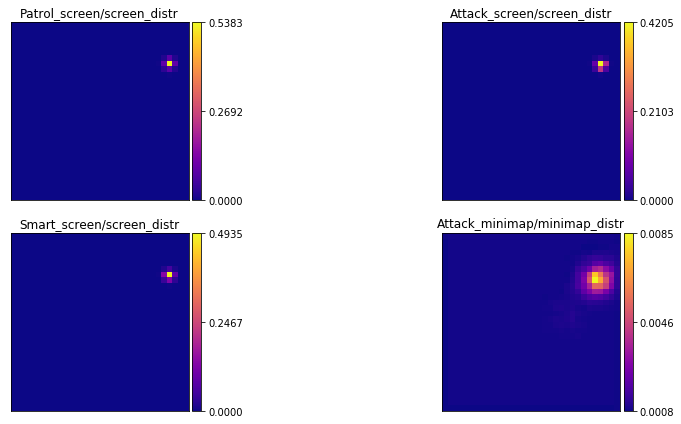


Step 47
Action Patrol_screen - prob : 0.615
Action Attack_screen - prob : 0.285
Action select_army - prob : 0.043
Action Smart_screen - prob : 0.041
Action Attack_minimap - prob : 0.009
-----------------------------------
Action chosen:  Patrol_screen


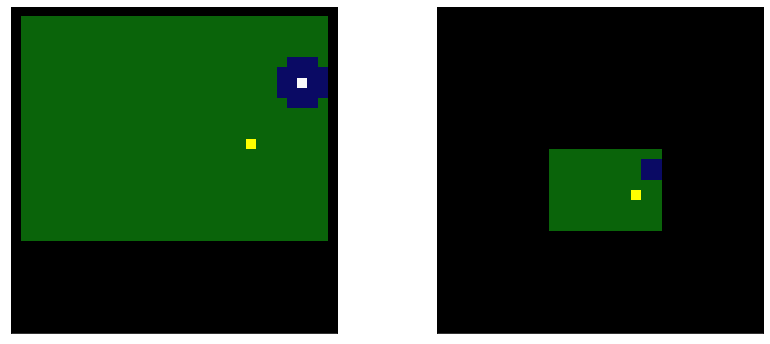

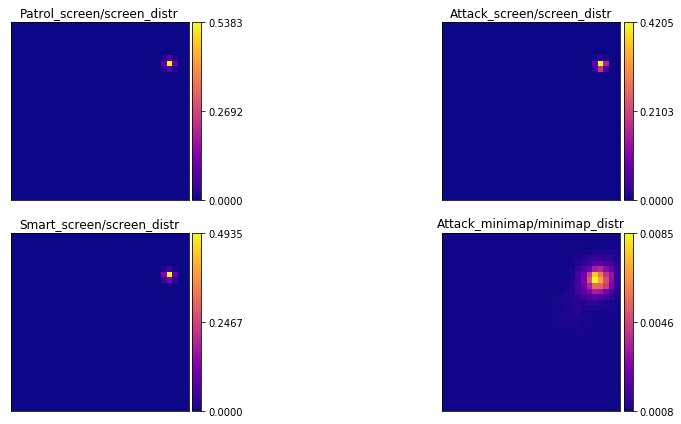


Step 48
Action Patrol_screen - prob : 0.623
Action Attack_screen - prob : 0.282
Action select_army - prob : 0.041
Action Smart_screen - prob : 0.039
Action Attack_minimap - prob : 0.009
-----------------------------------
Action chosen:  Patrol_screen


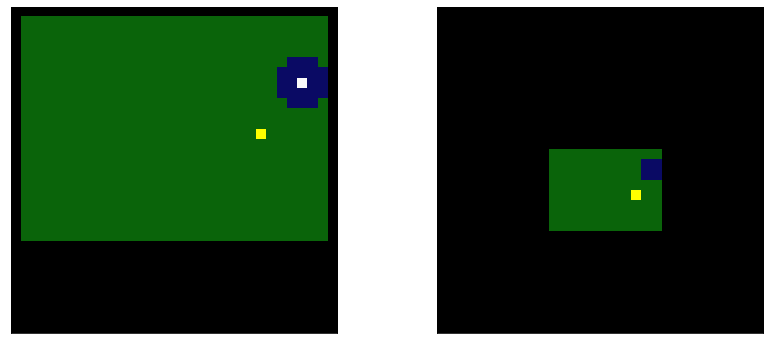

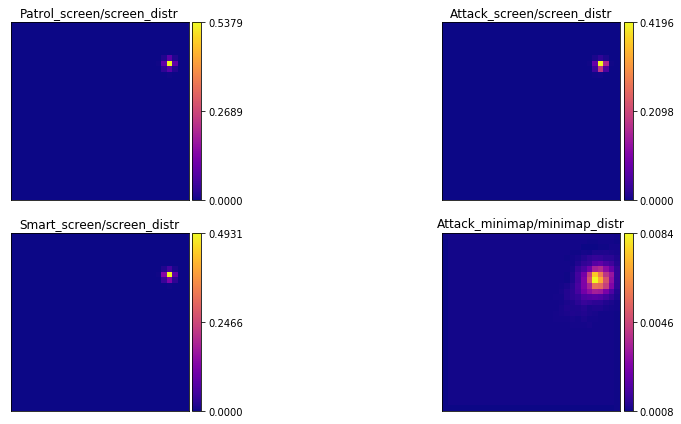


Step 49
Action Patrol_screen - prob : 0.627
Action Attack_screen - prob : 0.281
Action select_army - prob : 0.040
Action Smart_screen - prob : 0.038
Action Attack_minimap - prob : 0.008
-----------------------------------
Action chosen:  Attack_screen


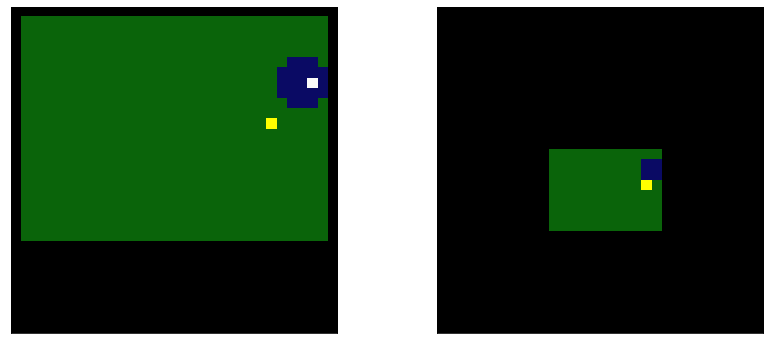

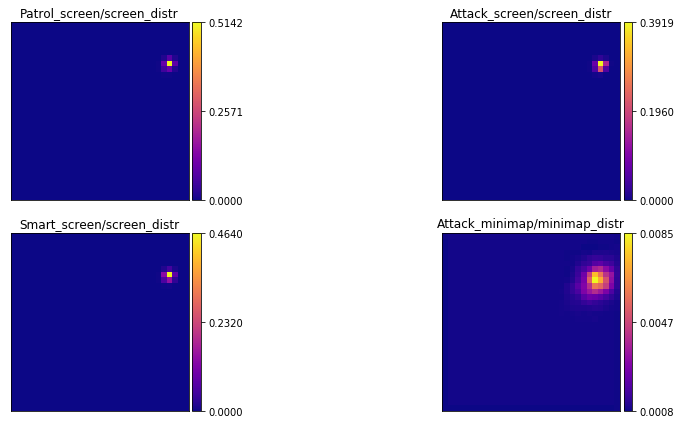

In [11]:
#for t in range(len(insp_dict['state_traj'])):
for t in range(50):
    print_action_info(inspector, insp_dict, t)
    plot_screen_and_decision(inspector, insp_dict, layer_names, t)
    #plot_screen_layers(insp_dict, layer_names, t)
    #plot_minimap_layers(insp_dict, layer_names, t)

# Old stuff

In [ ]:
d = insp_dict

In [ ]:
current_state = d['state_traj'][t]['spatial'][0]
current_state.shape

In [16]:
a = d['action_sel'][t][0]
a

451

In [18]:
arg_names = inspector.act_to_arg_names[a]
arg_names

['Smart_screen/queued', 'Smart_screen/screen']

In [21]:
real_arg_names = [arg.split('/')[1] for arg in arg_names]
real_arg_names

['queued', 'screen']

In [26]:
click = None
if 'screen' in real_arg_names:
    args = d['args'][t][0]
    for arg in args:
        if len(arg) == 2:
            click = arg
            break
        else:
            continue
print(click)

[25, 18]


In [ ]:
def plot_screen_distr(d, t, alpha=0.7):
    spatial_args = get_spatial_args(d)
    num_spatial_args = len(spatial_args)
    grid = (2, math.ceil(num_spatial_args/2))
    gs1 = gridspec.GridSpec(*grid)
    
    for i in range(num_spatial_args):
        ax1 = plt.subplot(gs1[i])
        ax1.set_title(spatial_args[i])
        probs = np.exp(d[spatial_args[i]][t])
        _plot_screen_distr(probs)
        plt.axis('on')

    plt.tight_layout()

In [31]:
d['top_5_action_distr'][t].keys()

dict_keys([451, 453, 13, 7, 2])

In [33]:
list(d['top_5_action_distr'][t][451].keys())

['Smart_screen/queued_distr', 'Smart_screen/screen_distr']

In [30]:
actions = d['top_5_actions'][t]
actions

array([451, 453,  13,   7,   2])

In [34]:
spatial_distr = []
spatial_names = []
for a in actions:
    arg_names = list(d['top_5_action_distr'][t][a].keys())
    print(arg_names)
    spatial_arg_names = [name for name in arg_names if ('screen_distr' in name) or ('minimap_distr' in name)]
    for sp_arg in spatial_arg_names:
        spatial_distr.append(d['top_5_action_distr'][t][a][sp_arg])
        spatial_names.append(sp_arg)
        
spatial_names

['Smart_screen/queued_distr', 'Smart_screen/screen_distr']
['Stop_quick/queued_distr']
['Attack_minimap/queued_distr', 'Attack_minimap/minimap_distr']
['select_army/select_add_distr']
['select_point/select_point_act_distr', 'select_point/screen_distr']


['Smart_screen/screen_distr',
 'Attack_minimap/minimap_distr',
 'select_point/screen_distr']